# Progetto MLDM - Bettinzana Martani - House Prices, Advanced Regression Techniques



# Setup


Tale sezione preliminare di setup serve a importare tutte le risorse e le librerie necessarie allo svolgimento del lavoro.

In [ ]:
import os
import graphviz
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd
import seaborn as sns
from tabulate import tabulate
from sklearn import datasets, ensemble
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.metrics import classification_report, confusion_matrix, r2_score, make_scorer, accuracy_score, precision_score, recall_score
from sklearn.model_selection import (
    GridSearchCV,
    StratifiedKFold,
    cross_val_score,
    train_test_split,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from mlxtend.regressor import StackingCVRegressor, StackingRegressor
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from scipy.spatial import distance
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import plot_importance

# Data

In questa prima fase ci concentreremo sull'importazione, sulla descrizione e sulla pulizia del nostro dataset, in modo tale da applicare le tecniche di machine learning e data mining solamente nel momento in cui i nostri dati di training saranno perfezionati.


## Data Import

Importiamo i dati di training e di test, che uniamo in un unico dataset. Inoltre visualizziamo l'head del nostro dataset, per avere una prima idea di come è strutturato e per capire da quanti e quali attributi (*features*) sono identificati i record.

In [ ]:
DATA_PATH = "https://raw.githubusercontent.com/SanBet98/ProgettoMLDMBettinzanaMartani/main/"

In [ ]:
train = pd.read_csv(DATA_PATH + "train.csv")
test = pd.read_csv(DATA_PATH + "test.csv")
test['SalePrice'] = 0

data = train.append(test,sort=False)

data.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]


## EDA (Exploratory data analysis)




Vediamo adesso una descrizione dettagliata di ciascun attributo presente all'interno del dataset. Questa descrizione è stata fornita inizialmente con i dati di training e di test, la riportiamo per fare in modo che chiunque legga questo notebook possa avere una piena comprensione dei dati trattati.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       

Dopo aver descritto le feature presenti all'interno del dataset, procediamo opportunamente a dividerle in due classi: feature qualitative, che sono caratterizzate da valori di tipo 'object' (generalmente valori nominali o ordinali di tipo stringa), e feature quantitative, che sono caratterizzate da valori numerici (che possono essere continui o discreti).

Questa distinzione è importante poichè ci permetterà di lavorare distintamente con i due insiemi di features per ottenere la massima qualità di informazione dal nostro dataset.


In [ ]:
quantitative = [feature for feature in train.columns if train.dtypes[feature] != 'object']
quantitative.remove('Id')
qualitative = [feature for feature in train.columns if train.dtypes[feature] == 'object']

In [ ]:
qualitative

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
quantitative

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

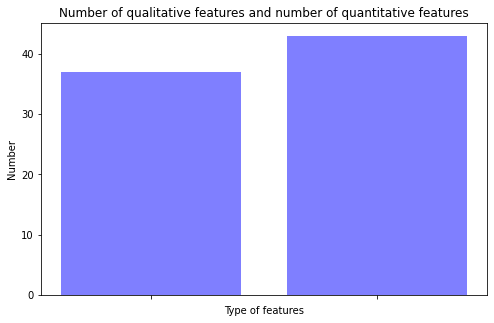

In [ ]:
features = []
countValues = []

countValues.append(len(quantitative))
countValues.append(len(qualitative))       

y_pos = ["quantitative","qualitative"]
f=plt.subplots(figsize=(8,5))
plt.bar(y_pos, countValues, align='center', alpha=0.5, color="blue")
plt.xticks(y_pos, features)
plt.ylabel('Number')
plt.xlabel('Type of features')
plt.title('Number of qualitative features and number of quantitative features')
plt.show()

Effettuiamo ora un'ulteriore suddivisione dei nostri dati: l'insieme delle features quantitative viene diviso in due, separando quelle a valori continui da quelle a valori discreti.

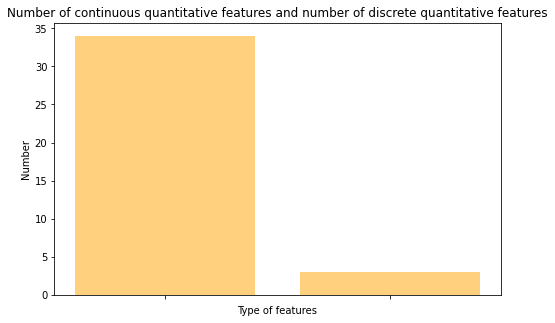

In [ ]:
quantitative.remove('MSSubClass')
quantitative.remove('OverallQual')
quantitative.remove('OverallCond')

continuous=quantitative
features = []
countValues = []

countValues.append(len(continuous))
countValues.append(3)

y_pos = ["continuous","discrete"]
f=plt.subplots(figsize=(8,5))
plt.bar(y_pos, countValues, align='center', alpha=0.5, color="orange")
plt.xticks(y_pos, features)
plt.ylabel('Number')
plt.xlabel('Type of features')
plt.title('Number of continuous quantitative features and number of discrete quantitative features')
plt.show()

Una volta divise le features fra quantitative e qualitative, mostriamo una prima correlazione fra le features quantitative: applichiamo la correlazione di spearman, in quanto è la migliore per calcolare anche le correlazioni non lineari fra le features quantitative.

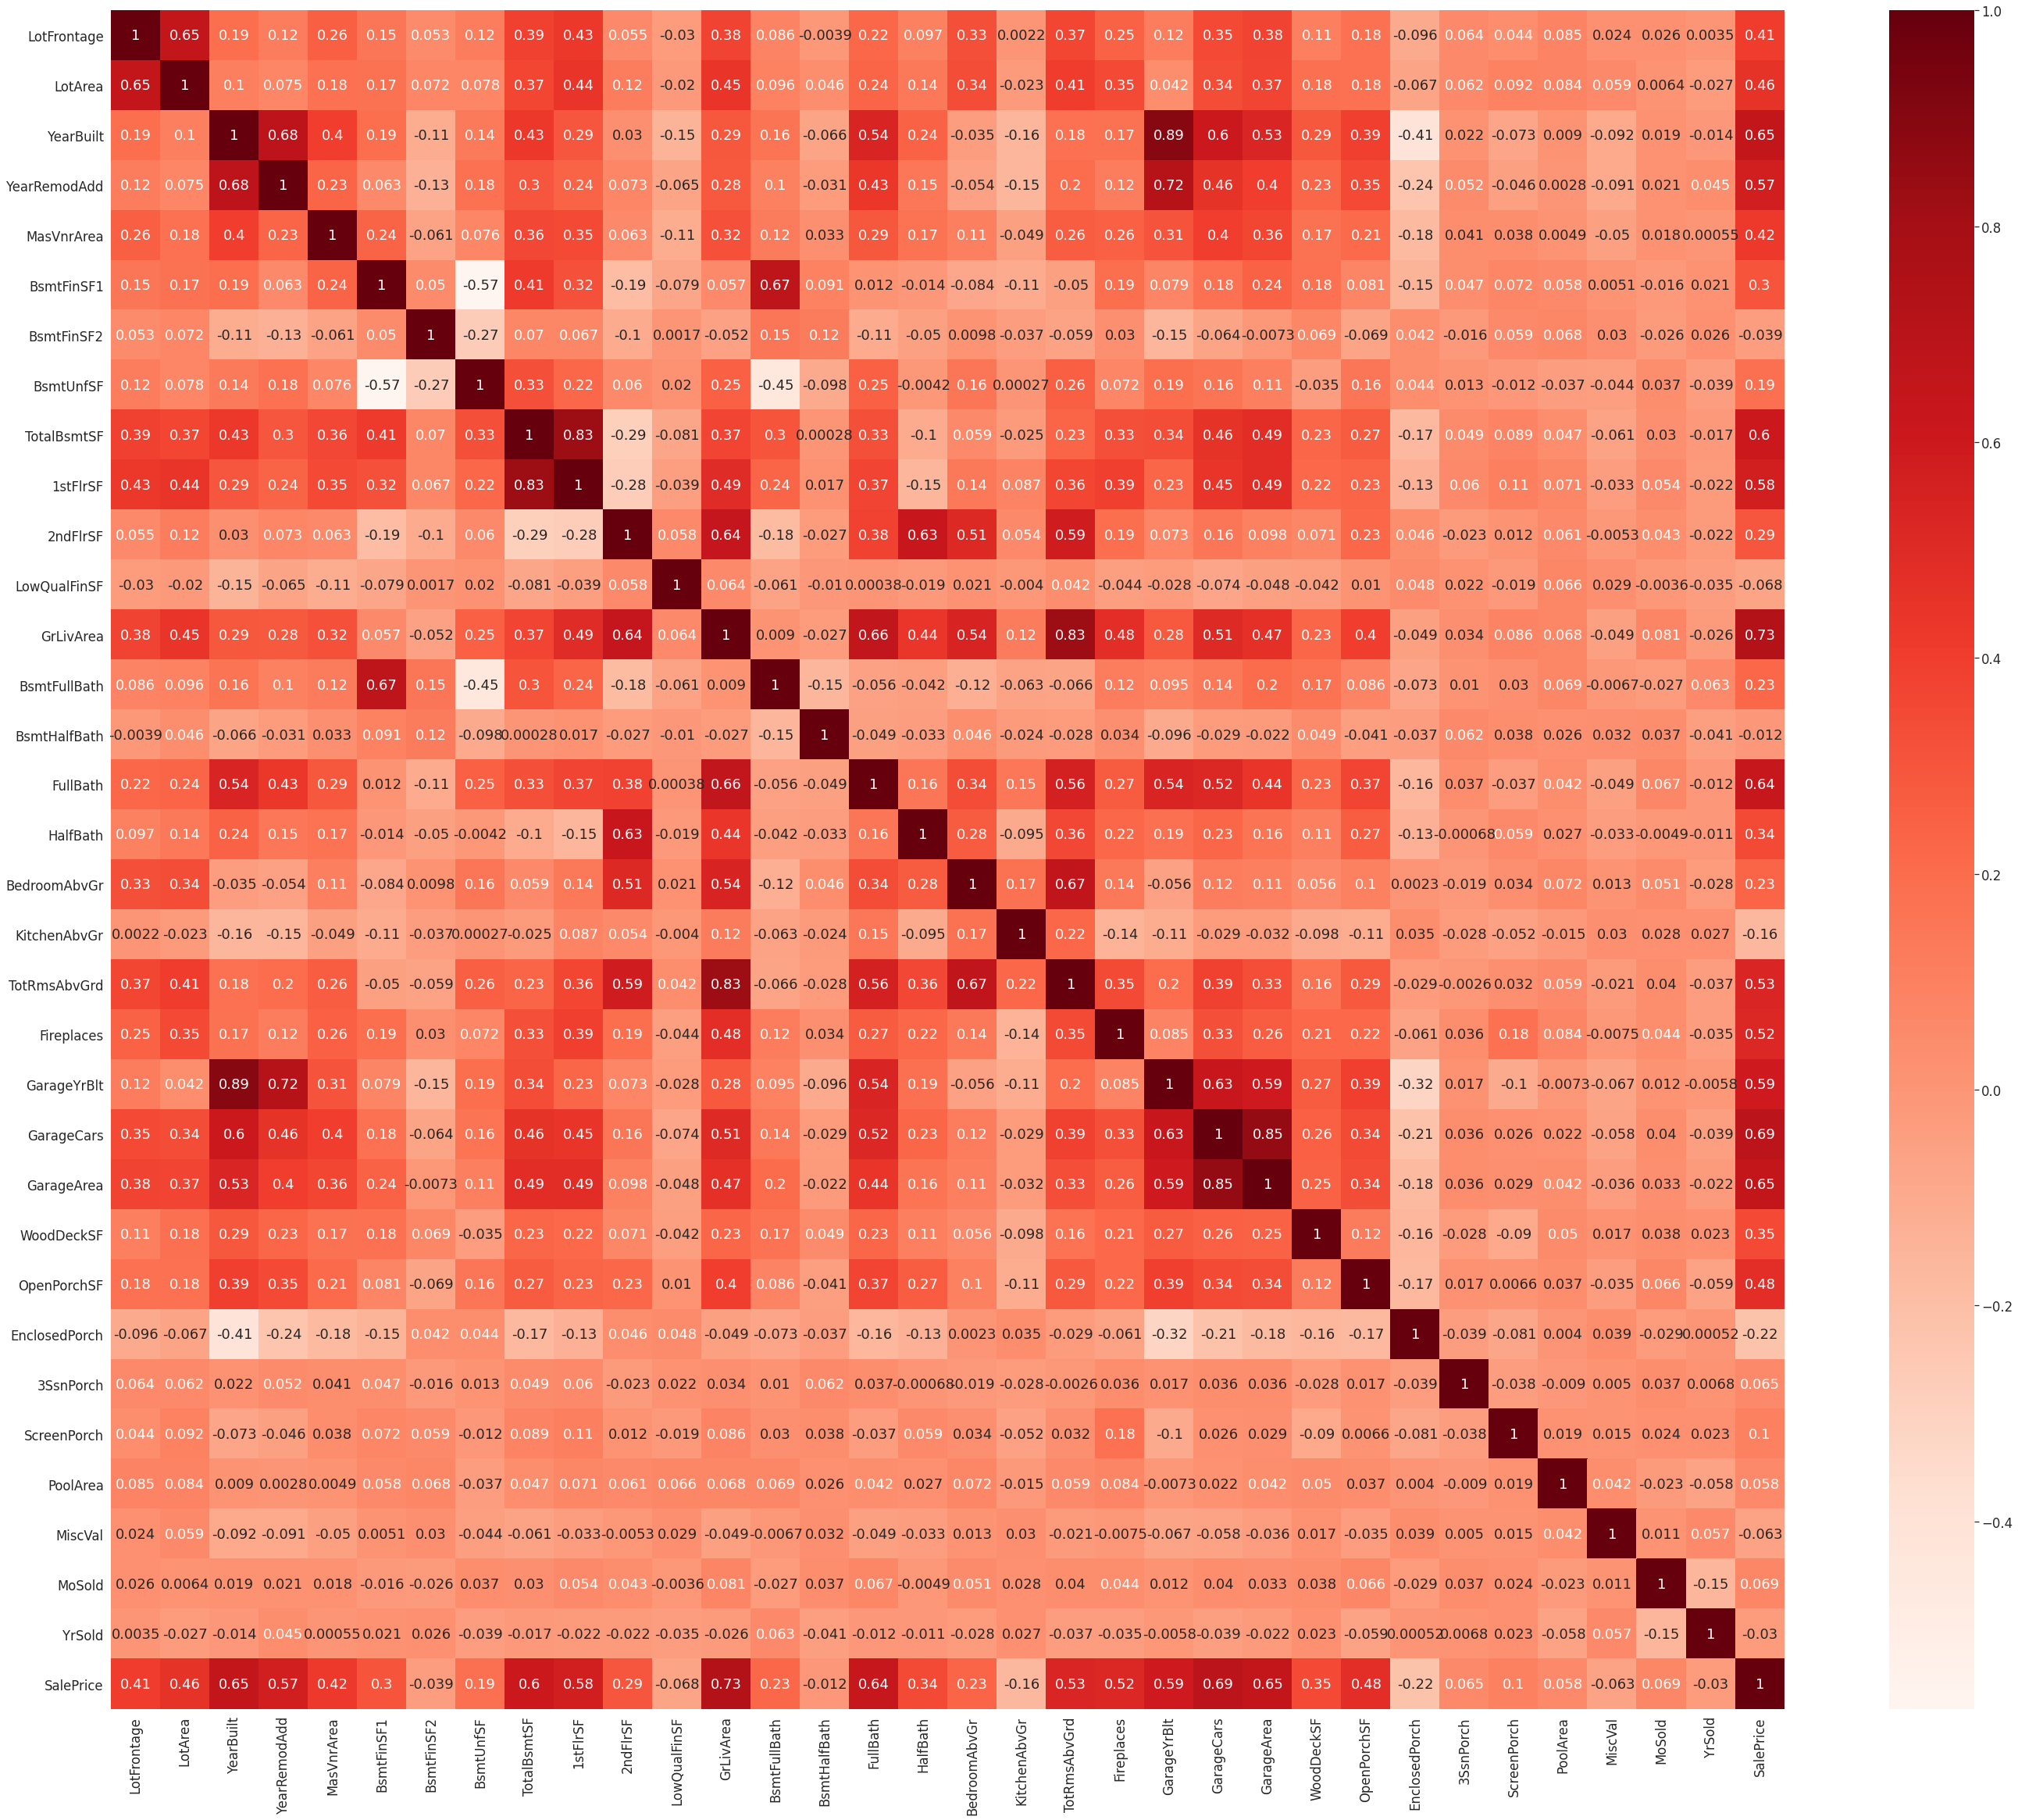

In [ ]:
plt.figure(figsize=(48,40))
sns.set(font_scale=1.5)
cor = train[quantitative].corr('spearman')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Data Cleaning


Provvediamo ora a pulire opportunamente i dati per estrapolare informazioni più utili riguardo al nostro dataset.

### Presenza di record duplicati nei dati

Prima di eseguire qualsiasi controllo verifichiamo la presenza di record duplicati nei dati.


In [ ]:
print(len(train))

1460


In [ ]:
if any(train.duplicated()):
  print("Ci sono record duplicati")
  train.dropna(axis=0, subset=data.duplicated())

print(len(train))

1460


Non c'è alcun record duplicato: continuiamo quindi col processo di data cleaning.

### Presenza di valori nulli nei dati

Il codice sottostante ci permette di visualizzare una semplice tabella che mostra i valori mancanti per ogni feature.
I valori in questione non ci aiutano in alcun modo nell'analisi e nella classificazione dei dati, pertanto vanno opportunamente trattati.

In [ ]:
features = []
nullValues = []

for i in data:
  features.append(i)
  nullValues.append(data.isna().sum()[i])
        
print(tabulate(np.c_[features,nullValues] , headers=["Feature","Count of NULL values"]))

Feature          Count of NULL values
-------------  ----------------------
Id                                  0
MSSubClass                          0
MSZoning                            4
LotFrontage                       486
LotArea                             0
Street                              0
Alley                            2721
LotShape                            0
LandContour                         0
Utilities                           2
LotConfig                           0
LandSlope                           0
Neighborhood                        0
Condition1                          0
Condition2                          0
BldgType                            0
HouseStyle                          0
OverallQual                         0
OverallCond                         0
YearBuilt                           0
YearRemodAdd                        0
RoofStyle                           0
RoofMatl                            0
Exterior1st                         1
Exterior2nd 

Andiamo ora a vedere nel dettaglio quali sono le feature con il maggior numero di valori mancanti e nulli in modo da trattarle opportunamente:

1) Il primo grafico mostra quelle feature che presentano in modo consistente dei valori mancanti. (CASO GRAVE)

2) Il secondo grafico mostra quelle features presenti nel dataset in cui si verifica sì l'assenza di valore negli attributi, ma in maniera piuttosto contenuta rispetto alla mole di dati a disposizione. (CASO MEDIO)

3) Il terzo grafico mostra invece quelle feature che possiedono un numero limitato di dati mancanti, ma che dobbiamo comunque trattare in qualche modo. (CASO LIEVE)

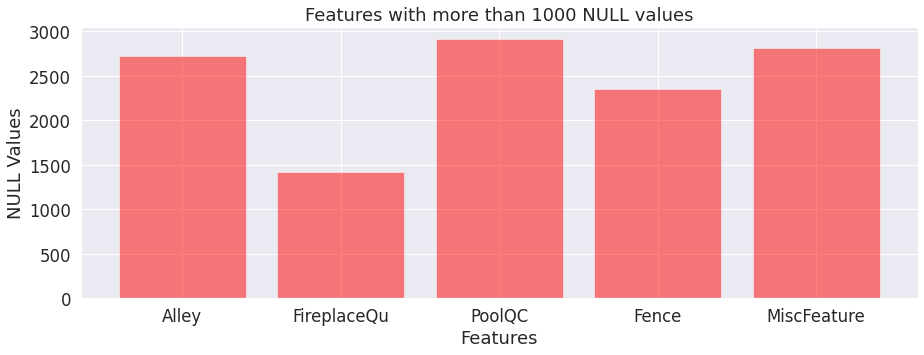

In [ ]:
features = []
nullValues = []

for i in data:
    if (data.isna().sum()[i])>1000 and i!='SalePrice':
        features.append(i)
        nullValues.append(data.isna().sum()[i])
        
y_pos = np.arange(len(features)) 
f=plt.subplots(figsize=(15,5))
plt.bar(y_pos, nullValues, align='center', alpha=0.5, color="red")
plt.xticks(y_pos, features)
plt.ylabel('NULL Values')
plt.xlabel('Features')
plt.title('Features with more than 1000 NULL values')
plt.show()

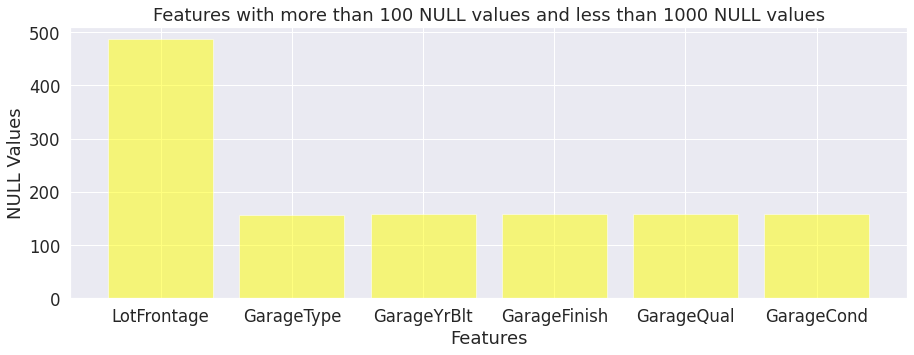

In [ ]:
features = []
nullValues = []

for i in data:
    if (data.isna().sum()[i])>100 and (data.isna().sum()[i])<=1000 and i!='SalePrice':
        features.append(i)
        nullValues.append(data.isna().sum()[i])

y_pos = np.arange(len(features)) 
f=plt.subplots(figsize=(15,5))
plt.bar(y_pos, nullValues, align='center', alpha=0.5,color="yellow")
plt.xticks(y_pos, features)
plt.ylabel('NULL Values')
plt.xlabel('Features')
plt.title('Features with more than 100 NULL values and less than 1000 NULL values')
plt.show()

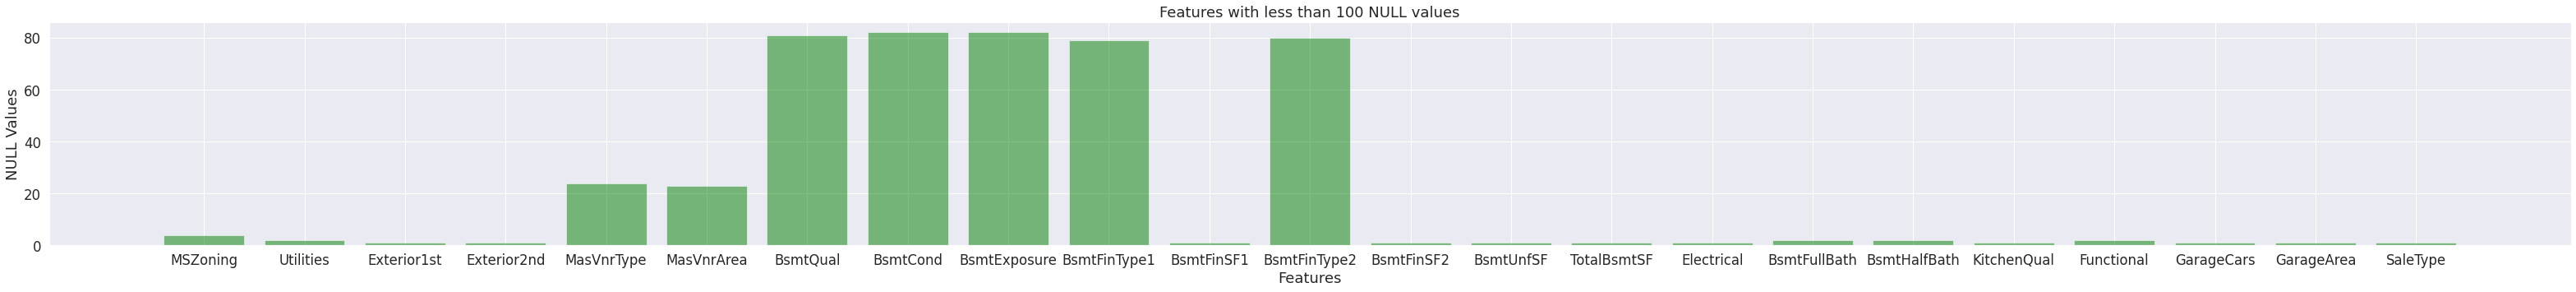

In [ ]:
features = []
nullValues = []

for i in data:
    if (data.isna().sum()[i])<=100 and (data.isna().sum()[i])>=1 and i!='SalePrice':
        features.append(i)
        nullValues.append(data.isna().sum()[i])
        
y_pos = np.arange(len(features)) 
f=plt.subplots(figsize=(55,5))
plt.bar(y_pos, nullValues, align='center', alpha=0.5, color="green")
plt.xticks(y_pos, features)
plt.ylabel('NULL Values')
plt.xlabel('Features')
plt.title('Features with less than 100 NULL values')
plt.show()

Andiamo a trattare le Features del primo grafico eliminandole dal nostro dataset in quanto contengono un numero eccessivo di valori mancanti.

In [ ]:
data = data.dropna(axis=1, how='any', thresh = 2000)
train = data[0:1460]
test = data[1460:]

Passiamo ora alle feature che compaiono nel secondo grafico: abbiamo ritenuto opportuno, dopo aver definito la distribuzione di probabilità dei possibili valori che queste assume, colmare i valori mancanti attraverso un'estrazione con reinserimento

Definiamo prima la funzione che restituisce la distribuzione di probabilità di un array.

In [ ]:
def probability_distribution(a):
 elements_count = {}

 for i in a:
   if i in elements_count:
       elements_count[i] += 1
   else:
       elements_count[i] = 1

 sol = []
 for i in np.unique(a):
   sol.append(elements_count.get(i)/len(a))
  
 return sol

Definiamo una funzione che colma i valori mancanti della feature estraendo, ogni qual volta incontriamo un valore uguale a 'NaN' nella colonna, un valore sulla base della distribuzione di probabilità calcolata sulla stessa.

In [ ]:
def fill_feature(feature):

 feature_not_null = feature[np.logical_not(pd.isna(feature))]
 feature_unique = np.unique(feature_not_null)
 a = probability_distribution(feature_not_null)
 b = random.choice(feature_unique, size=None, replace=True, p=a)

 for i in range(len(feature)):
   if pd.isna(feature[i]):
    feature[i] = random.choice(feature_unique, size=None, replace=True, p=a)

 return feature

Applichiamo la funzione 'fill_feature' a tutte quelle features che presentano un numero di valori nulli maggiore di 100, senza far distinzione tra features qualitative e quantititative.

In [ ]:
for i in data:
    if (data.isna().sum()[i])>=100 and i!='SalePrice':
      train[i]=fill_feature(train[i])
      test[i]=fill_feature(test[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Infine, per quanto riguarda le features che contengono meno di 100 valori mancanti (quelle rappresentate nel terzo grafico, per intenderci) adottiamo una distinzione tra qualitative e quantitative. 
Per quanto riguarda le quantitative, andiamo a riempire i valori mancanti facendo la media di tutti i valori presenti in quella colonna, trattando il training set ed il test set separatamente, in modo tale da non creare interdipendenze fra i due.

In [ ]:
train = train.fillna(train.mean())
test = test.fillna(test.mean())

Per quanto riguarda le features qualitative, andiamo invece a riempire i valori mancanti applicando la funzione 'fill_feature' definita in precedenza.

In [ ]:
for i in data:
    if (data.isna().sum()[i])<100 and (data.isna().sum()[i])>=1 and i!='SalePrice':
      train[i]=fill_feature(train[i])
      test[i]=fill_feature(test[i])

data = train.append(test,sort=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Una volta applicati i dovuti trattamenti alle features che presentavano valori mancanti, andiamo a ricalcolare ed a stamparne il numero per ogni features, in modo tale da verificare che non siano più presenti all'interno del nostro dataset, sia per quanto riguarda il training set, sia per quanto riguarda il test set.

In [ ]:
features = []
nullValues = []

for i in train:
  features.append(i)
  nullValues.append(train.isna().sum()[i])
        
print(tabulate(np.c_[features,nullValues] , headers=["Feature","Count of NULL values"]))

Feature          Count of NULL values
-------------  ----------------------
Id                                  0
MSSubClass                          0
MSZoning                            0
LotFrontage                         0
LotArea                             0
Street                              0
LotShape                            0
LandContour                         0
Utilities                           0
LotConfig                           0
LandSlope                           0
Neighborhood                        0
Condition1                          0
Condition2                          0
BldgType                            0
HouseStyle                          0
OverallQual                         0
OverallCond                         0
YearBuilt                           0
YearRemodAdd                        0
RoofStyle                           0
RoofMatl                            0
Exterior1st                         0
Exterior2nd                         0
MasVnrType  

In [ ]:
features = []
nullValues = []

for i in test:
  features.append(i)
  nullValues.append(test.isna().sum()[i])
        
print(tabulate(np.c_[features,nullValues] , headers=["Feature","Count of NULL values"]))

Feature          Count of NULL values
-------------  ----------------------
Id                                  0
MSSubClass                          0
MSZoning                            0
LotFrontage                         0
LotArea                             0
Street                              0
LotShape                            0
LandContour                         0
Utilities                           0
LotConfig                           0
LandSlope                           0
Neighborhood                        0
Condition1                          0
Condition2                          0
BldgType                            0
HouseStyle                          0
OverallQual                         0
OverallCond                         0
YearBuilt                           0
YearRemodAdd                        0
RoofStyle                           0
RoofMatl                            0
Exterior1st                         0
Exterior2nd                         0
MasVnrType  

Con questo controllo finisce la prima parte di preprocessing dei dati: partendo dal dataset originale abbiamo trattato il problema dei valori mancanti, eliminando quelle colonne che ne presentavano un numero talmente alto da rendere impossibile una stima corretta degli stessi e riempiendo le colonne di quelle features che invece presentavano valori mancanti in percentuali minori, ovviamente trattando in modo differente le features qualitative e le features quantitative.

### Feature Engineering

All'interno delle feature quantitative osserviamo insiemi di feature che possono essere aggregate senza perdere informazioni importanti al fine di snellire il dataset.
Nel codice sottostante andiamo a creare tali feature.

In [ ]:
data['YrBltAndRemod'] = data['YearBuilt'] + data['YearRemodAdd']

data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

data['Total_sqr_footage'] = (data['BsmtFinSF1'] + data['BsmtFinSF2'] +
                                 data['1stFlrSF'] + data['2ndFlrSF'])

data['Total_Bathrooms'] = (data['FullBath'] + (0.5 * data['HalfBath']) +
                               data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath']))

data['Total_porch_sf'] = (data['OpenPorchSF'] + data['3SsnPorch'] +
                              data['EnclosedPorch'] + data['ScreenPorch'] +
                              data['WoodDeckSF'])

Una volta create le nuove feature rimuoviamo dal dataset quelle ridondanti

In [ ]:
data.drop(['YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','OpenPorchSF','3SsnPorch','WoodDeckSF'], axis=1, inplace=True)
train = data[0:1459]
test = data[1459:]
data

Id  MSSubClass  ... Total_Bathrooms  Total_porch_sf
0        1          60  ...             3.5              61
1        2          20  ...             2.5             298
2        3          60  ...             3.5              42
3        4          70  ...             2.0             307
4        5          60  ...             3.5             276
...    ...         ...  ...             ...             ...
1454  2915         160  ...             1.5               0
1455  2916         160  ...             1.5              24
1456  2917          20  ...             2.0             474
1457  2918          85  ...             1.5             112
1458  2919          60  ...             2.5             238

[2919 rows x 67 columns]

Esplorando il dataset abbiamo trovato alcune feature irrilevanti:
'Utilities' assume quasi totalmente il valore 'ALLPub' all'interno dei dati, lo stesso accade per la feature 'Street' col valore 'pave'

In [ ]:
print(len(data['Utilities']))

count=0
for i in data['Utilities']:
  if i=='AllPub':
    count+=1

print(count)

2919
2918


In [ ]:
print(len(data['Street']))

count=0
for i in data['Street']:
  if i=='pave':
    count+=1

print(count)

2919
0


Abbiamo deciso di toglierle in quanto non portano alcun contributo

In [ ]:
data.drop(['Utilities','Street'], axis=1, inplace=True)
train = data[0:1459]
test = data[1459:]

### Valutazione delle correlazioni tra le features







Ora che le features non presentano valori mancanti e sono state opportunamente ingegnerizzate, possiamo analizzarne con maggior dettaglio la correlazione.


Prendiamo come riferimento la feature dipendente 'SalePrice' (che è il valore che dovremo imparare a prevedere mediante appositi algoritmi) ed analizziamo la correlazione che le features hanno con essa, per stabilire quali sono fondamentali per il suo calcolo e quali invece possono essere scartate. 


Vediamo anche la correlazione fra le coppie di features: in caso emergano forti correlazioni fra le diverse features, possiamo togliere dal dataset la coppia di features presa in analisi e sostituirla con il valore della correlazione, in modo tale da snellire ulteriormente il dataset e velocizzare gli algoritmi di apprendimento.


Ricordiamo che la correlazione è applicabile solamente alle features quantitative: andiamo ad aggiornare gli array 'qualitative' e 'quantitative' costruiti nella fase di EDA con le modifiche effettuate nel feature engineering. 

In [ ]:
quantitative = [feature for feature in train.columns if train.dtypes[feature] != 'object']
quantitative.remove('Id')
qualitative = [feature for feature in train.columns if train.dtypes[feature] == 'object']

Per prima cosa applichiamo la correlazione di spearman, in quanto è la migliore per calcolare anche le correlazioni non lineari fra le features quantitative.



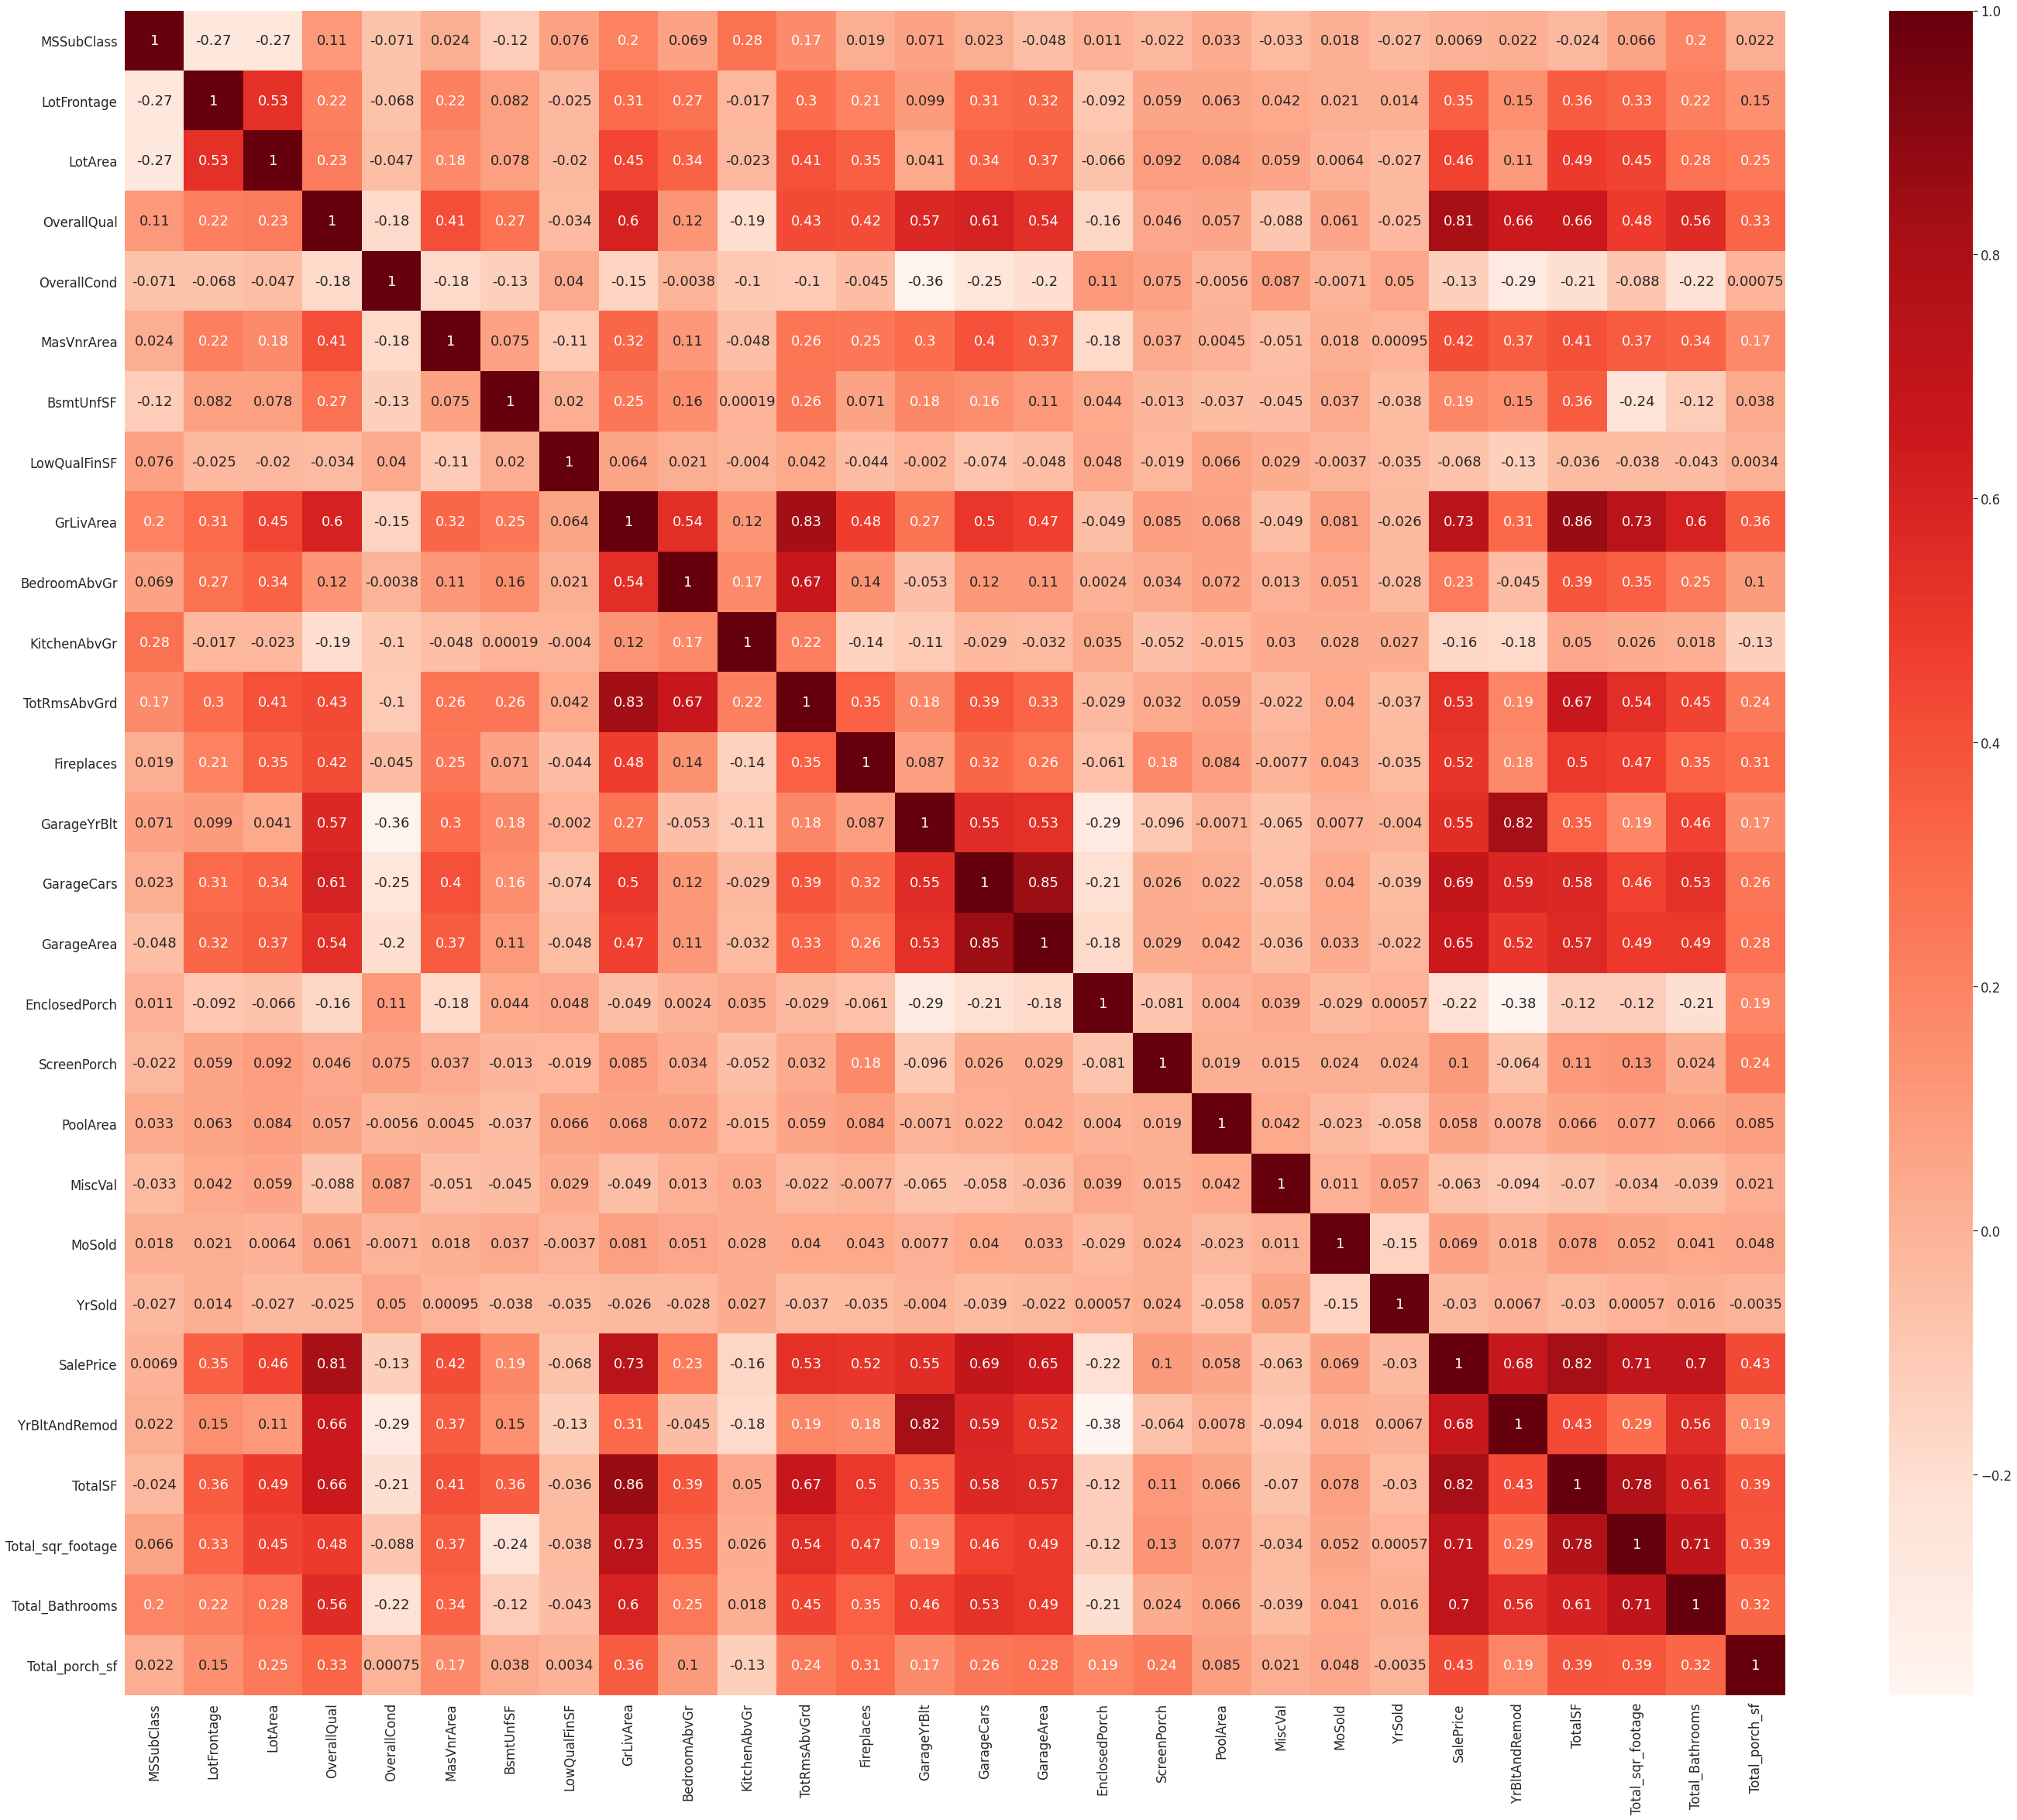

In [ ]:
plt.figure(figsize=(48,40))
sns.set(font_scale=1.5)
cor = train[quantitative].corr('spearman')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Una volta calcolata la correlazione, abbiamo stampato una heatmap che ci aiuta a visualizzare meglio i nostri risultati: concentriamoci sull'ultima colonna, che rappresenta la correlazione che le nostre features hanno con 'SalePrice'.

Possiamo dividere le features in alcuni gruppi, sulla base del valore di correlazione.

Per prima cosa analizziamo il primo gruppo, che rappresenta le features con un'alta correlazione con 'SalePrice': possiamo affermare che saranno fondamentali per la predizione del valore di 'SalePrice', quindi non verranno scartate.

Mostriamo ora, con appositi grafici, la correlazione che hanno con 'SalePrice'.




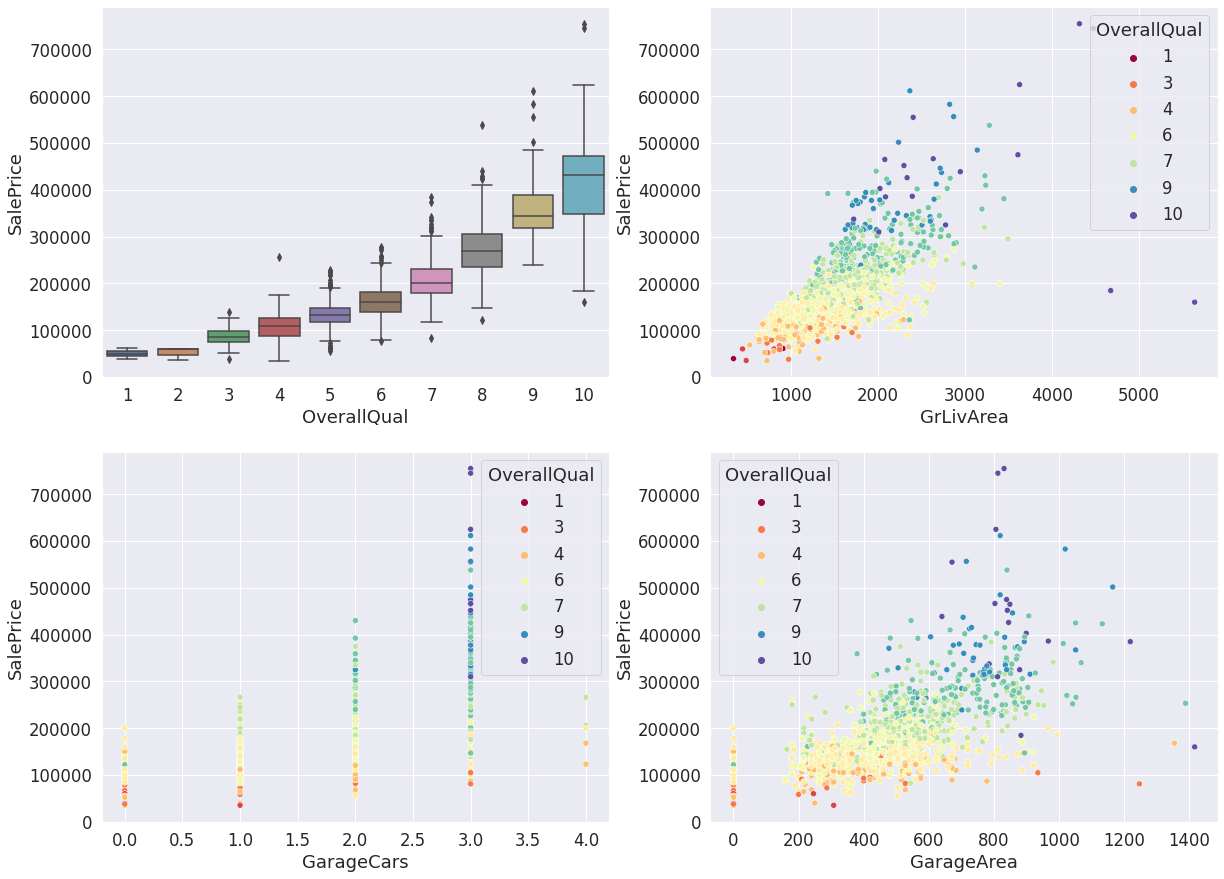

In [ ]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

# (Corr= 0.817185) Box plot overallqual/salePrice
fig1=fig.add_subplot(221);
sns.boxplot(x='OverallQual', y='SalePrice', data=train[['SalePrice', 'OverallQual']])

# (Corr= 0.700927) GrLivArea vs SalePrice plot
fig2 = fig.add_subplot(222); 
sns.scatterplot(x = train.GrLivArea, y = train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

# (Corr= 0.680625) GarageCars vs SalePrice plot
fig3 = fig.add_subplot(223); 
sns.scatterplot(x = train.GarageCars, y = train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

# (Corr= 0.650888) GarageArea vs SalePrice plot
fig4 = fig.add_subplot(224); 
sns.scatterplot(x = train.GarageArea, y = train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

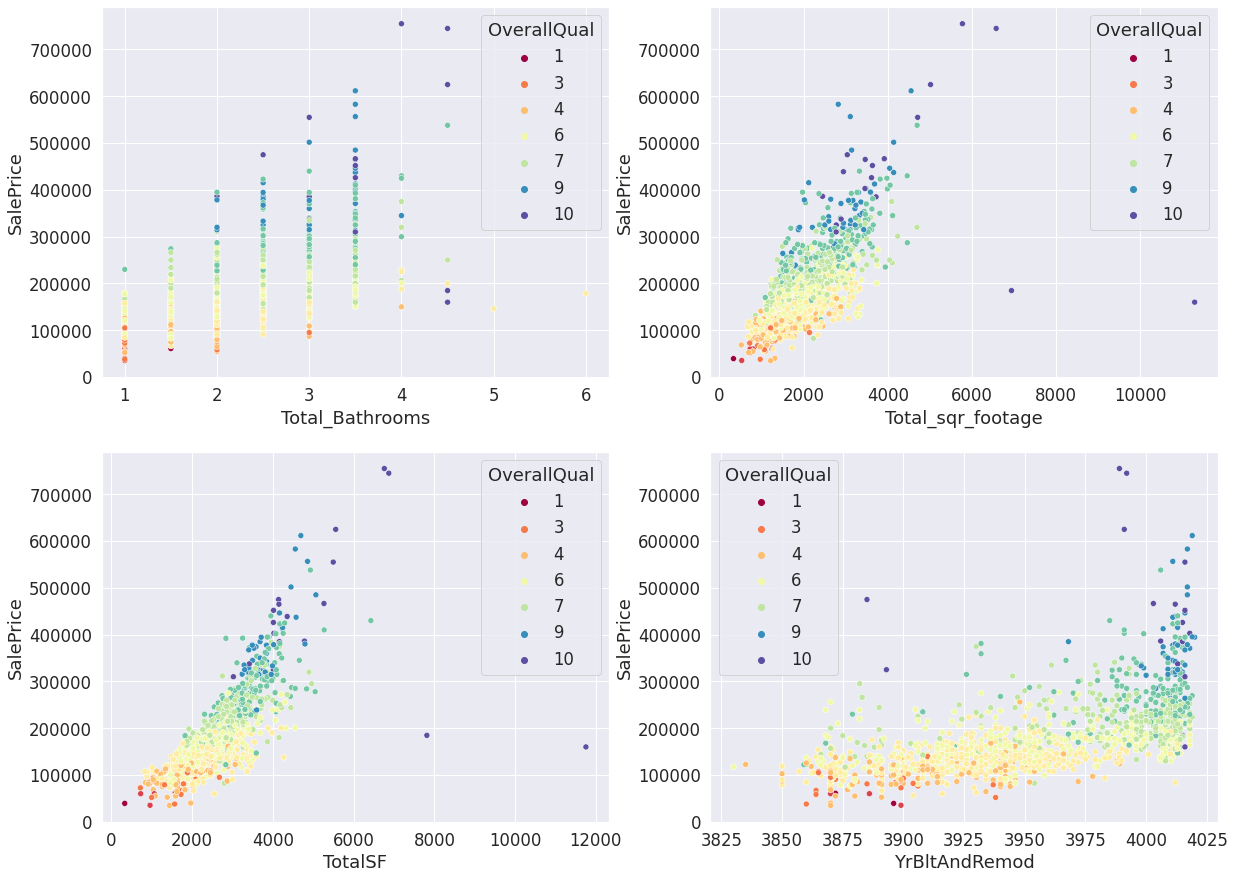

In [ ]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

# (Corr= 0.700927) GrLivArea vs SalePrice plot
fig2 = fig.add_subplot(221); 
sns.scatterplot(x = train.Total_Bathrooms, y = train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

# (Corr= 0.700927) GrLivArea vs SalePrice plot
fig2 = fig.add_subplot(222); 
sns.scatterplot(x = train.Total_sqr_footage, y = train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

# (Corr= 0.700927) GrLivArea vs SalePrice plot
fig2 = fig.add_subplot(223); 
sns.scatterplot(x = train.TotalSF, y = train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

# (Corr= 0.700927) GrLivArea vs SalePrice plot
fig2 = fig.add_subplot(224); 
sns.scatterplot(x = train.YrBltAndRemod, y = train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

Analizziamo ora la correlazione tra 'SalePrice' e le features qualitative, realizzata mediante una funzione customizzata che associa ai diversi valori delle features qualitative dei numeri in modo tale da poter visualizzare graficamente queste correlazioni.

In [ ]:
def corr_qualitative(feature,salePrice,feature_name):
  feature_values=[]
  featureMem=[]
  featureMem.append(feature[0])
  feature_values.append(0)
  v=1
  for i in range (1,len(feature)):
    j=0
    if feature[i]==featureMem[0]:
      feature_values.append(0)
    
    else:
      while (j<i and feature[i]!=featureMem[j]):
        j+=1
      if j<i:
        feature_values.append(feature_values[j])
      else:
        feature_values.append(v)
        v+=1
        
    featureMem.append(feature[i])    

  featureMemUnique=np.unique(featureMem, return_counts=True)
  
  print(feature_name)
  
  fig = plt.figure(figsize=(20, 15))
  fig1=fig.add_subplot(221);
  sns.scatterplot(x=feature_values,y=train['SalePrice'], hue=train['OverallQual'], legend='auto')
 

  print(featureMemUnique)

MSZoning
(array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype='<U7'), array([  10,   65,   16, 1150,  218]))
LotShape
(array(['IR1', 'IR2', 'IR3', 'Reg'], dtype='<U3'), array([484,  41,  10, 924]))
LandContour
(array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='<U3'), array([  63,   50,   36, 1310]))
LotConfig
(array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype='<U7'), array([ 263,   94,   47,    4, 1051]))
LandSlope
(array(['Gtl', 'Mod', 'Sev'], dtype='<U3'), array([1381,   65,   13]))
Neighborhood
(array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
       'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
       'Veenker'], dtype='<U7'), array([ 17,   2,  16,  58,  28, 150,  51,  99,  79,  37,  17,  49, 225,
         9,  73,  41,  77, 113,  25,  74,  59,  86,  25,  38,  11]))
Condition1
(array(['Artery', 'Feedr', 'N

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


BsmtFinType2
(array(['ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf'], dtype='<U3'), array([  19,   36,   14,   46,   56, 1288]))
Heating
(array(['Floor', 'GasA', 'GasW', 'Grav', 'OthW', 'Wall'], dtype='<U5'), array([   1, 1427,   18,    7,    2,    4]))
HeatingQC


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

(array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype='<U2'), array([741,  49, 240,   1, 428]))
CentralAir
(array(['N', 'Y'], dtype='<U1'), array([  95, 1364]))
Electrical
(array(['FuseA', 'FuseF', 'FuseP', 'Mix', 'SBrkr'], dtype='<U5'), array([  94,   27,    3,    1, 1334]))
KitchenQual


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

(array(['Ex', 'Fa', 'Gd', 'TA'], dtype='<U2'), array([100,  39, 586, 734]))
Functional
(array(['Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sev', 'Typ'], dtype='<U4'), array([  14,    5,   31,   34,   15,    1, 1359]))
GarageType


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

(array(['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd'],
      dtype='<U7'), array([  7, 917,  20,  93,   9, 413]))
GarageFinish
(array(['Fin', 'RFn', 'Unf'], dtype='<U3'), array([376, 446, 637]))
GarageQual
(array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype='<U2'), array([   3,   52,   18,    3, 1383]))
GarageCond
(array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype='<U2'), array([   3,   36,   10,    7, 1403]))
PavedDrive


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

(array(['N', 'P', 'Y'], dtype='<U1'), array([  90,   30, 1339]))
SaleType
(array(['COD', 'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'New', 'Oth', 'WD'],
      dtype='<U5'), array([  43,    4,    2,    9,    5,    5,  122,    3, 1266]))
SaleCondition


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


(array(['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial'],
      dtype='<U7'), array([ 101,    4,   12,   20, 1197,  125]))


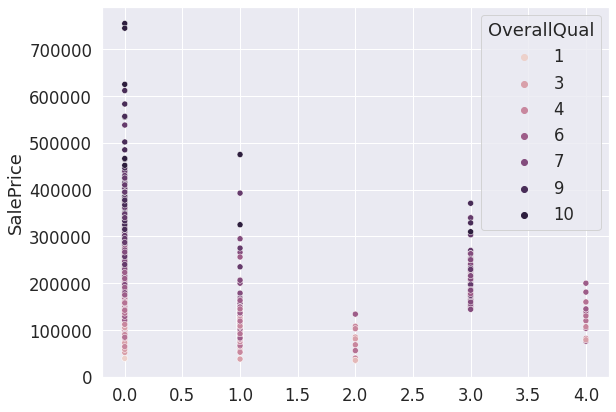

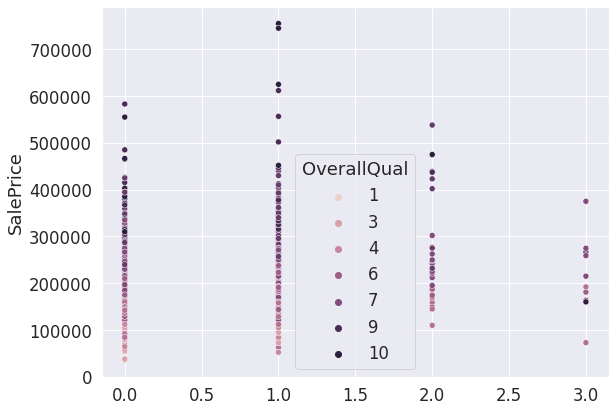

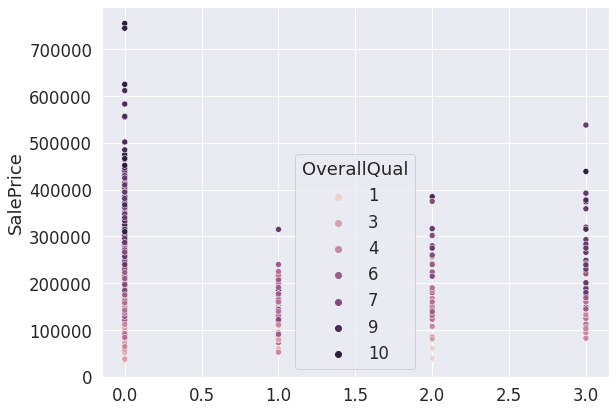

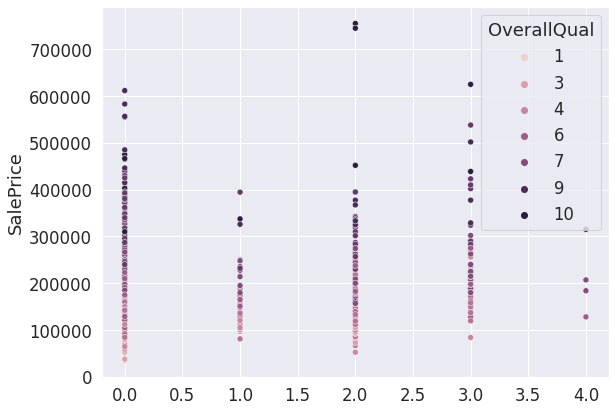

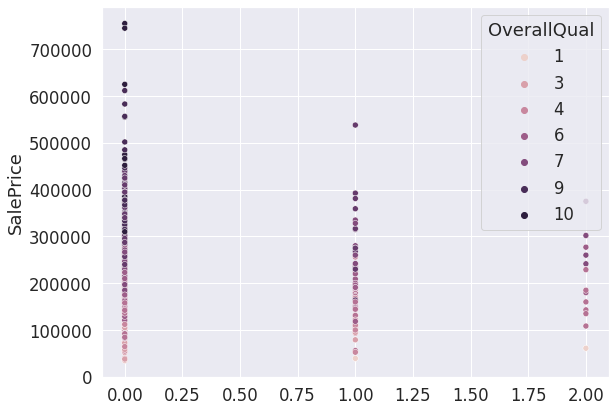

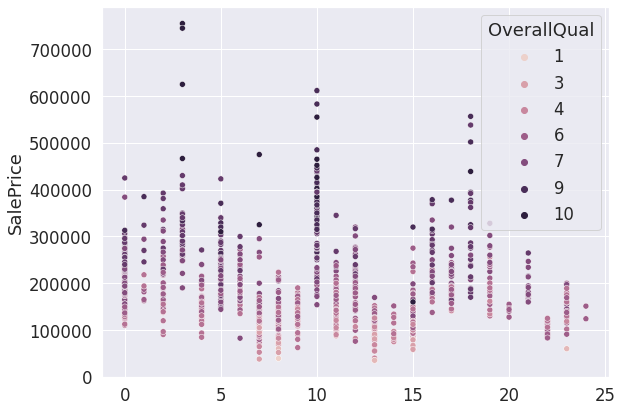

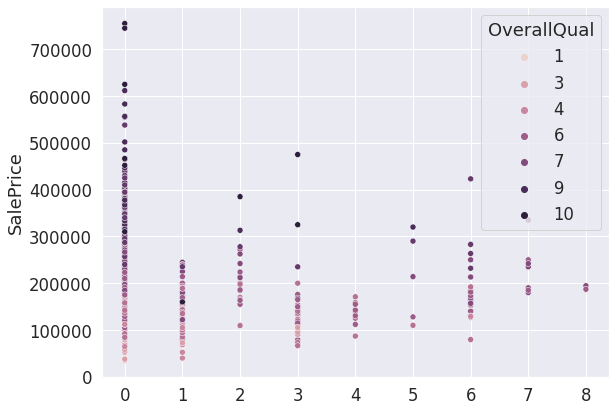

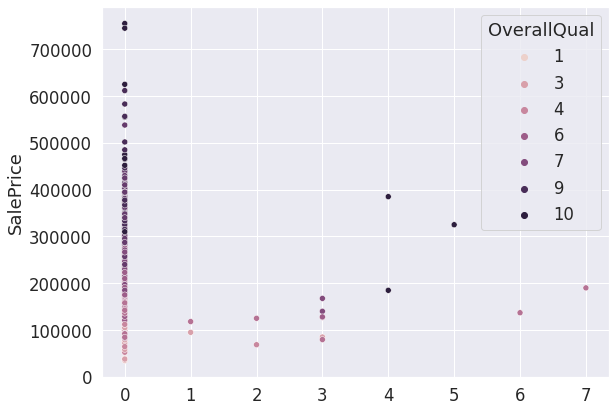

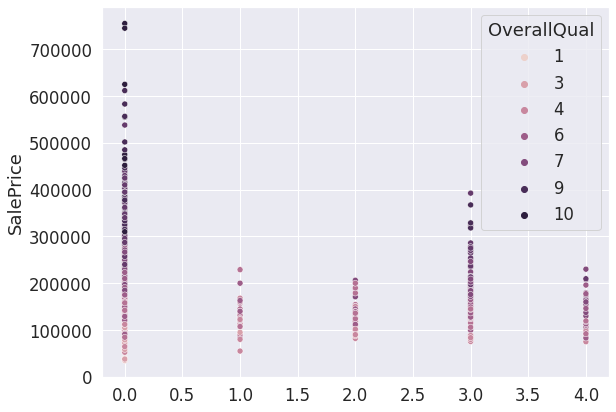

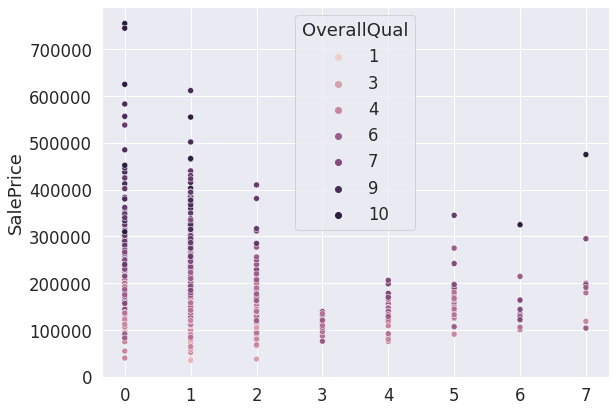

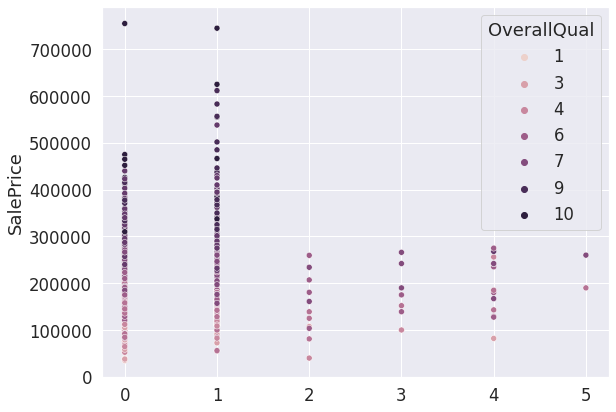

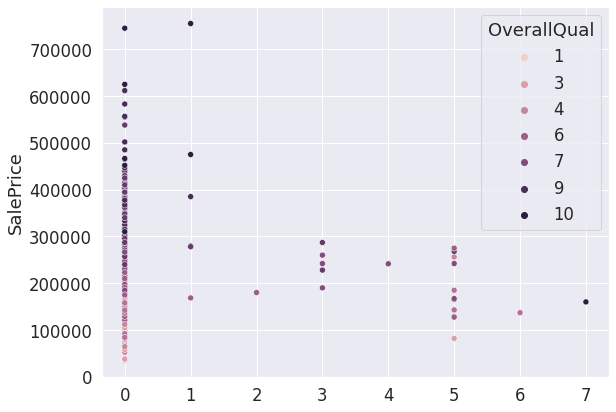

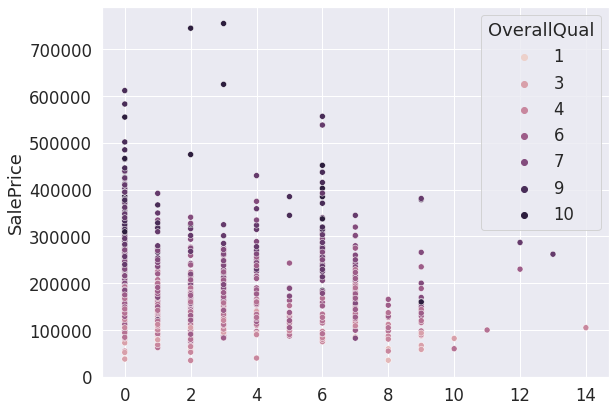

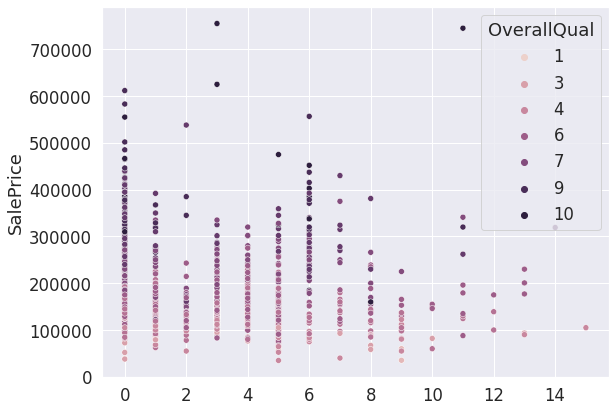

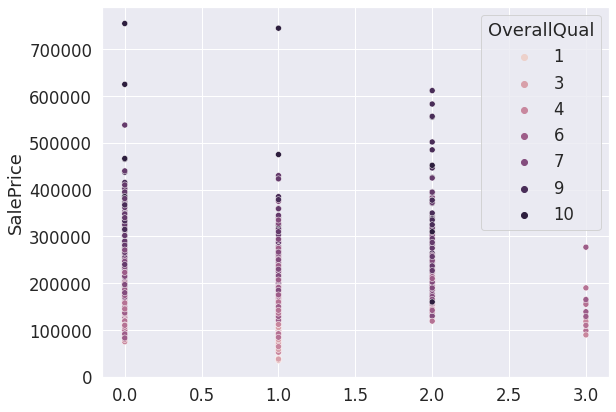

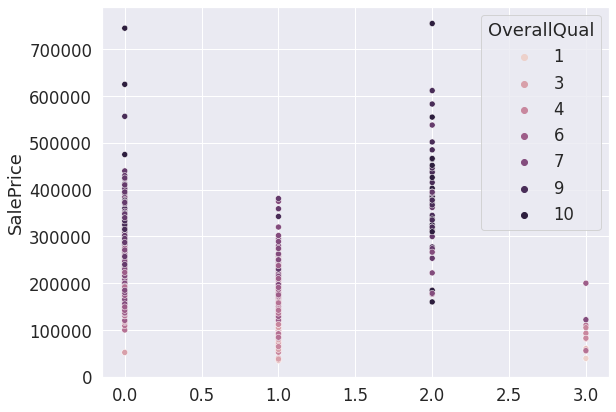

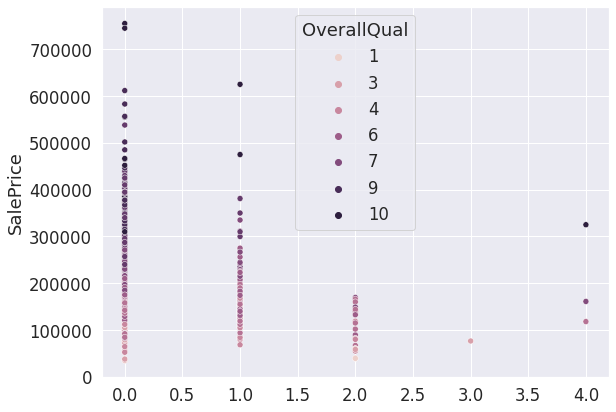

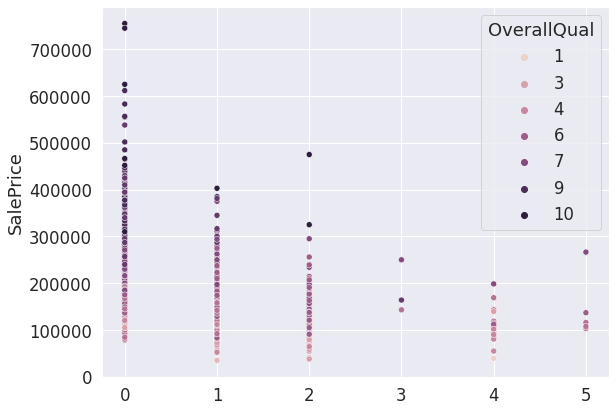

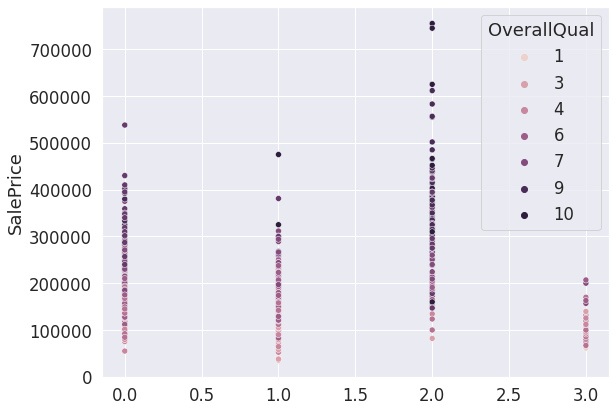

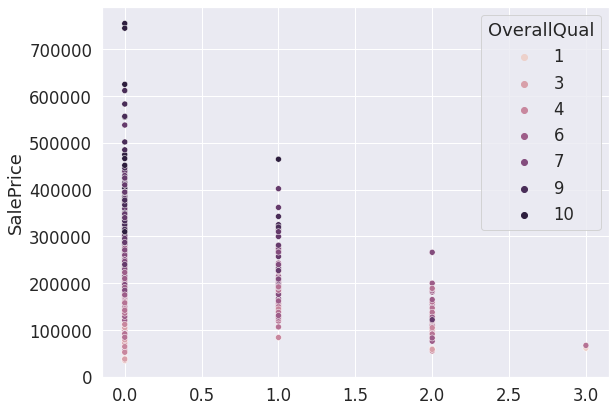

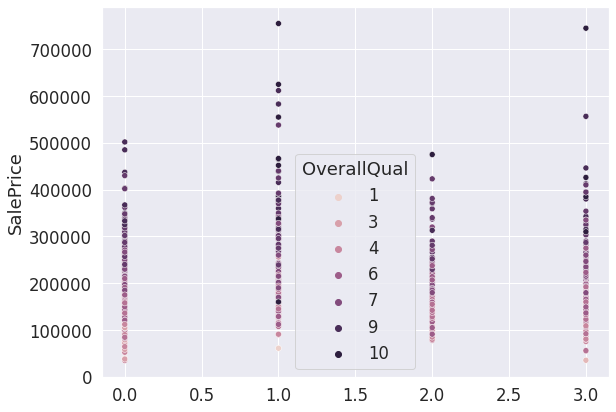

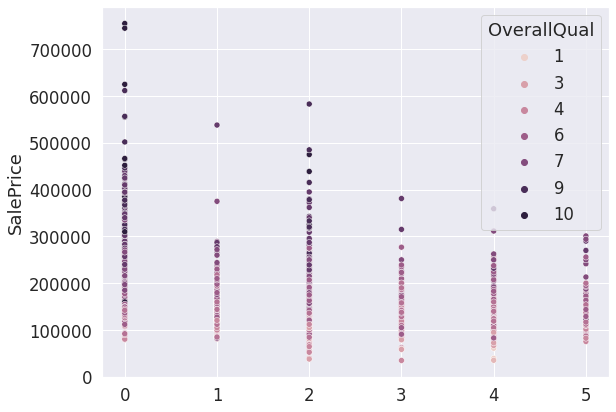

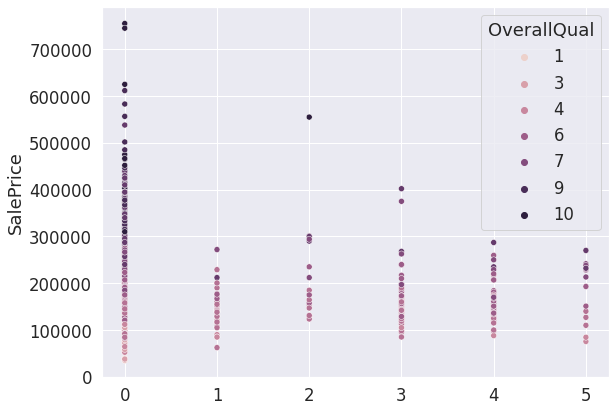

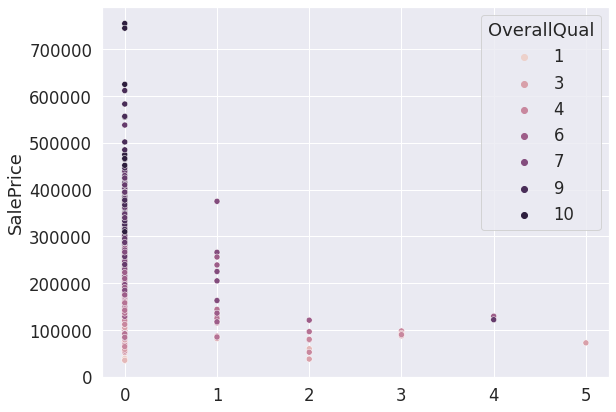

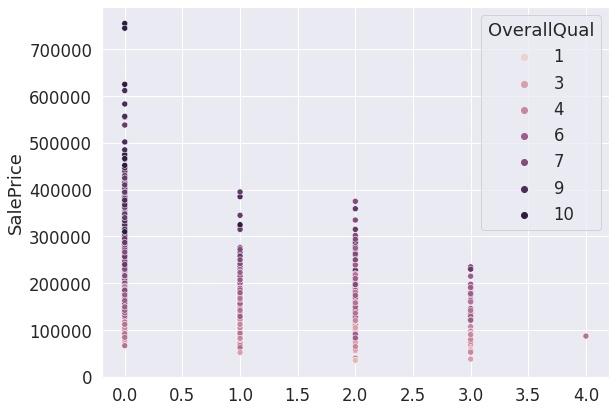

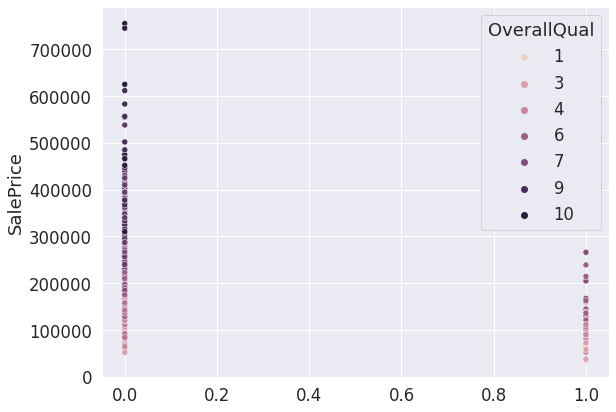

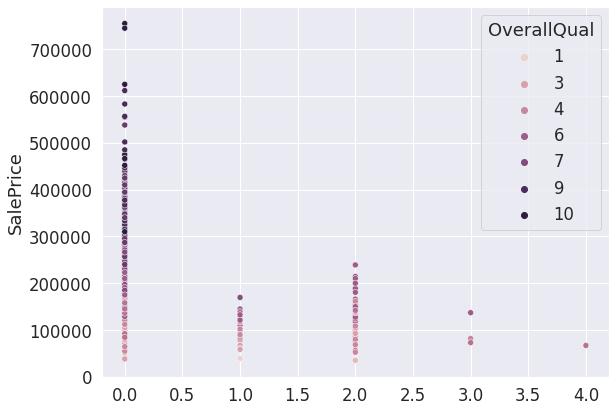

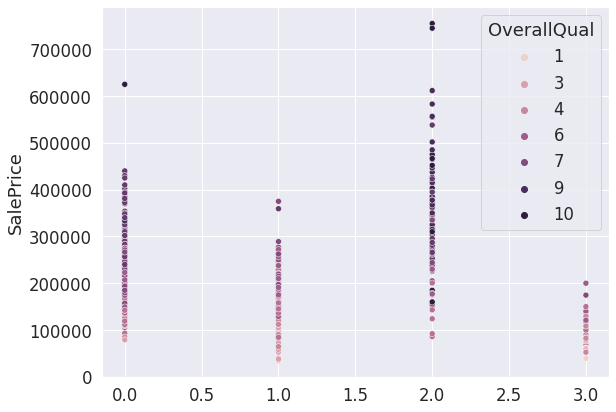

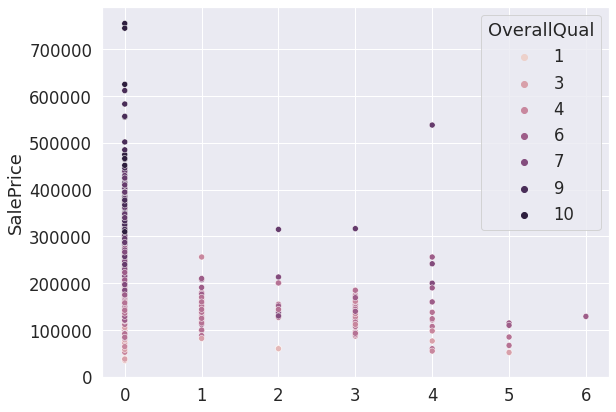

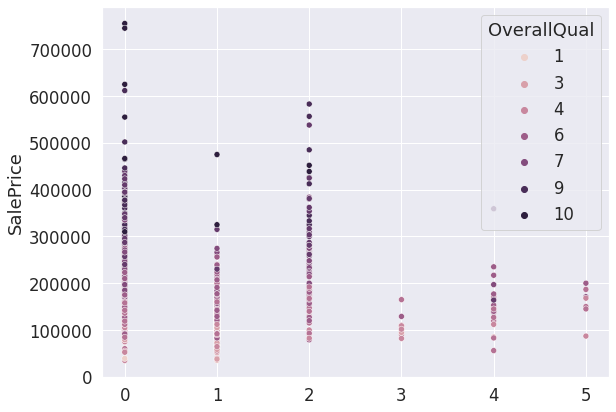

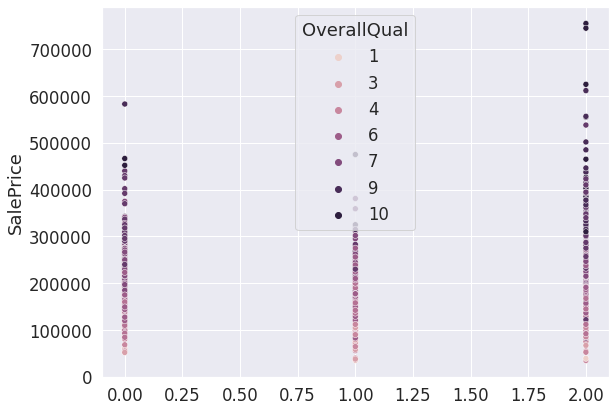

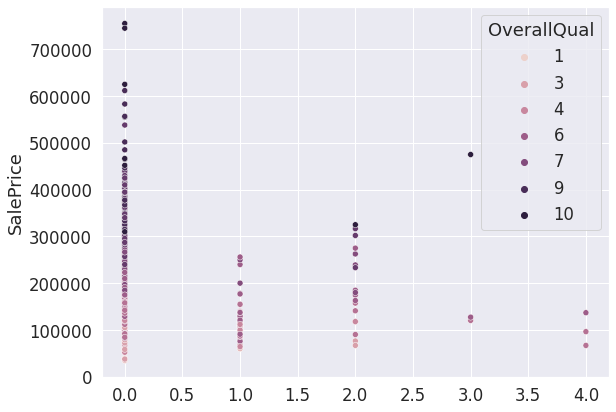

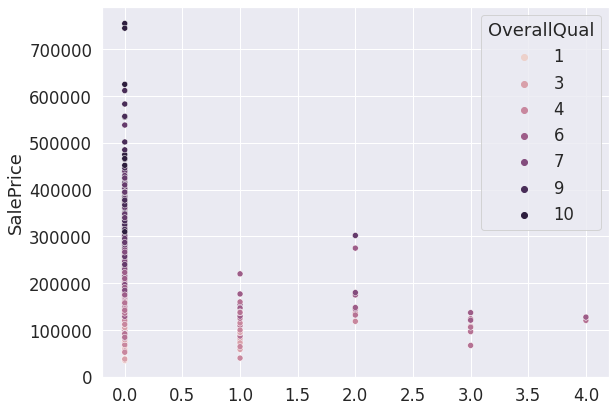

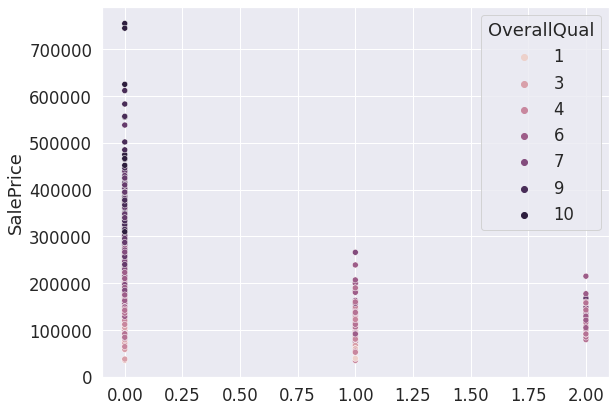

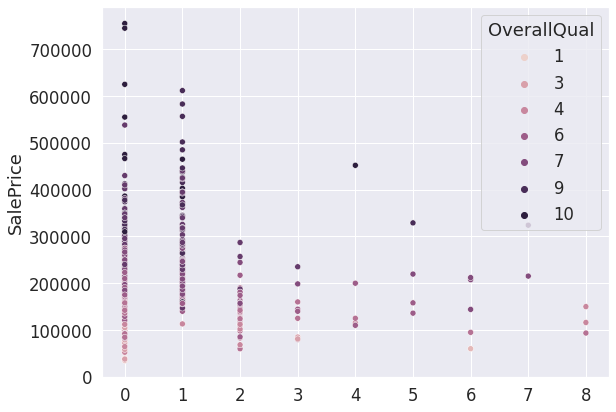

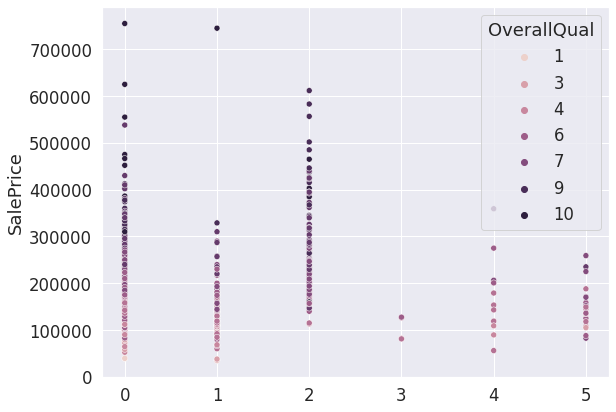

In [ ]:
for feature in qualitative:
  corr_qualitative(train[feature],train['SalePrice'],feature)

Riplottiamo ora le variabili qualitative che nei grafici precedenti hanno catturato la nostra attenzione, in modo tale da evidenziarle meglio per poi andare a trattare eventuali outliers.


Condition2
(array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn'],
      dtype='<U6'), array([   2,    6, 1444,    1,    2,    1,    1,    2]))


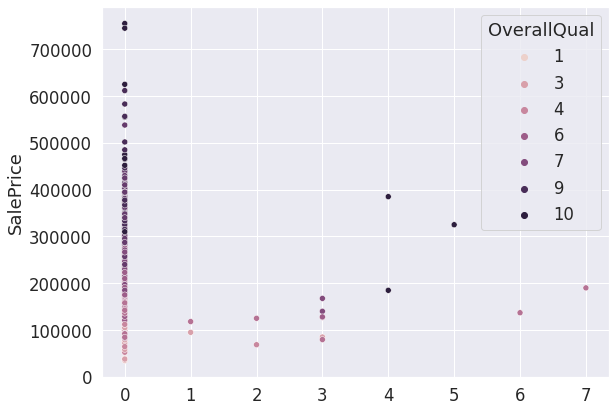

In [ ]:
corr_qualitative(train['Condition2'],train['SalePrice'],'Condition2')

RoofMatl
(array(['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv',
       'WdShake', 'WdShngl'], dtype='<U7'), array([   1, 1433,    1,    1,    1,   11,    5,    6]))


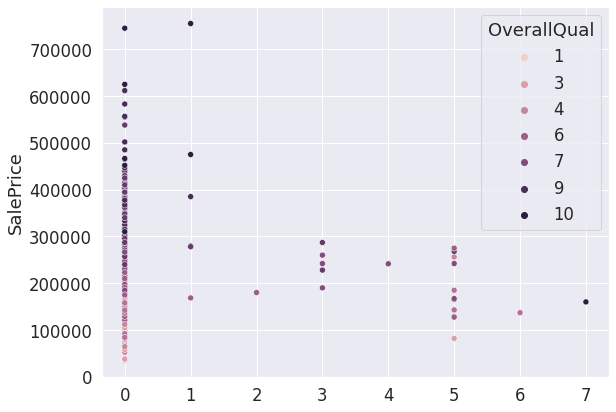

In [ ]:
corr_qualitative(train['RoofMatl'],train['SalePrice'],'RoofMatl')

Foundation
(array(['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'], dtype='<U6'), array([146, 633, 647,  24,   6,   3]))


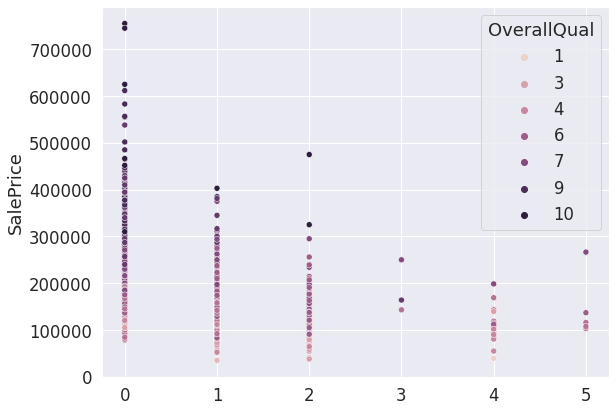

In [ ]:
corr_qualitative(train['Foundation'],train['SalePrice'],'Foundation')

Heating
(array(['Floor', 'GasA', 'GasW', 'Grav', 'OthW', 'Wall'], dtype='<U5'), array([   1, 1427,   18,    7,    2,    4]))


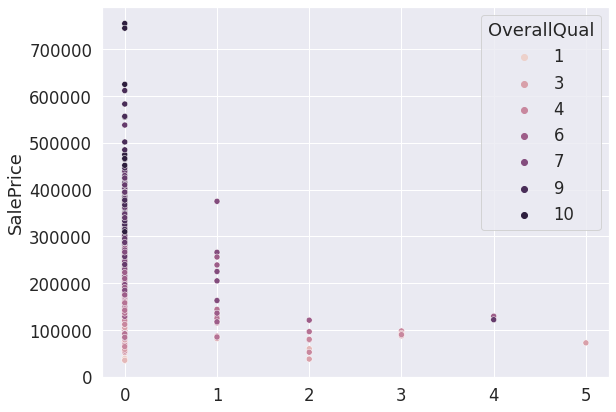

In [ ]:
corr_qualitative(train['Heating'],train['SalePrice'],'Heating')

HeatingQC
(array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype='<U2'), array([741,  49, 240,   1, 428]))


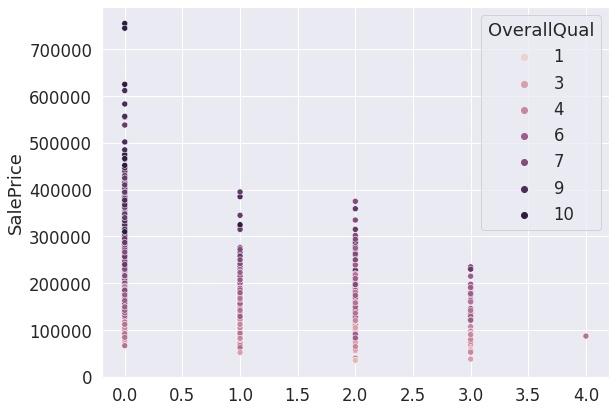

In [ ]:
corr_qualitative(train['HeatingQC'],train['SalePrice'],'HeatingQC')

Electrical
(array(['FuseA', 'FuseF', 'FuseP', 'Mix', 'SBrkr'], dtype='<U5'), array([  94,   27,    3,    1, 1334]))


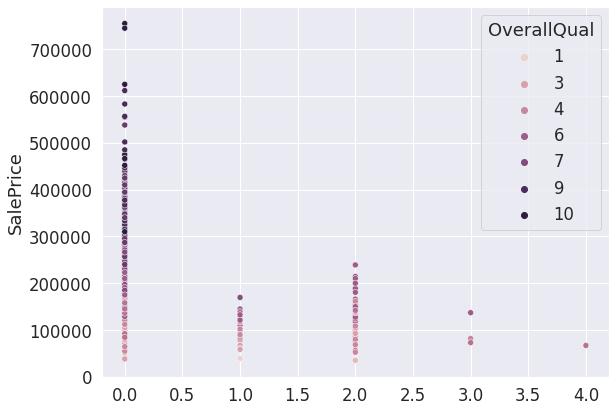

In [ ]:
corr_qualitative(train['Electrical'],train['SalePrice'],'Electrical')

### Rimozione Outliers

Una volta mostrata la correlazione fra le varie features e 'SalePrice', eliminiamo dal nostro training set tutti quei record che contengono outliers.

Partiamo dalle features quantitative

In [ ]:
train = train.drop(train[(train.OverallQual==4) & (train.SalePrice>200000)].index)
train = train.drop(train[(train.OverallQual==8) & (train.SalePrice>500000)].index)
train = train.drop(train[(train.GarageArea>1200) & (train.SalePrice<300000)].index)
train = train.drop(train[(train.GrLivArea>4000) & (train.SalePrice<300000)].index)
train = train.drop(train[(train.TotalSF>6000) & (train.SalePrice<500000)].index)

In [ ]:
len(train)

1451

E continuiamo con le features qualitative

In [ ]:
train = train[train.Condition2=='Norm']
train = train[train.RoofMatl=='CompShg']
train = train[train.Foundation!='Stone']
train = train[train.Foundation!='Wood']
train = train[train.Heating=='GasA']
train = train[train.HeatingQC!='Po']
train = train[train.Electrical!='Mix']
train = train[train.Electrical!='FuseP']

Guardiamo la nuova lunghezza del training set dopo aver rimosso gli outliers

In [ ]:
len(train)

1370

### Trattamento delle feature qualitative (String Values)


Per poter applicare correttamente gli algoritmi di regressione, è necessario trasformare tutte le feature qualitative (caratterizzate da valori di tipo stringa) che sono rimaste all'interno del dataset, in quanto la regressione è possibile calcolarla solamente passando in input valori numerici. 
Creiamo quindi delle dummy variables: ogni feature qualitativa viene sostituita da tante colonne quanti sono i valori possibili per quella feature e per ogni record assegniamo in ogni colonna 0 oppure 1 per stabilire qual è il valore che era contenuto in precedenza.

In [ ]:
data=train.append(test,sort=False)
data=pd.get_dummies(data)

In [ ]:
data.head()

Id  MSSubClass  ...  SaleCondition_Normal  SaleCondition_Partial
0   1          60  ...                     1                      0
1   2          20  ...                     1                      0
2   3          60  ...                     1                      0
3   4          70  ...                     0                      0
4   5          60  ...                     1                      0

[5 rows x 249 columns]

In [ ]:
trainDummies=data.iloc[0:1371]
testDummies=data.iloc[1371:]

Prima di eliminare la colonna Id dal dataset, la salviamo (almeno per quanto riguarda la parte del test set) perchè è fondamentale per la creazione della submission.

In [ ]:
trainDummies.drop(axis=1, columns='Id')
testDummies_id=testDummies['Id']
testDummies.drop(axis=1, columns='Id')

MSSubClass  LotFrontage  ...  SaleCondition_Normal  SaleCondition_Partial
0             20         80.0  ...                     1                      0
1             20         81.0  ...                     1                      0
2             60         74.0  ...                     1                      0
3             60         78.0  ...                     1                      0
4            120         43.0  ...                     1                      0
...          ...          ...  ...                   ...                    ...
1454         160         21.0  ...                     1                      0
1455         160         21.0  ...                     0                      0
1456          20        160.0  ...                     0                      0
1457          85         62.0  ...                     1                      0
1458          60         74.0  ...                     1                      0

[1459 rows x 248 columns]

# Regression Algorithms

Prima di procedere, eliminiamo la colonna 'SalePrice' dal test set, in quanto non era presente originariamente ma è stata generata quando abbiamo unito training set e test set nella fase di data pre-processing.

In [ ]:
testDummies = testDummies.drop("SalePrice", axis=1) #Remove SalePrice column
Y = np.log1p(trainDummies["SalePrice"])
X = trainDummies.drop("SalePrice", axis=1) #Remove SalePrice column

## Grid Search with Lasso (least absolute shrinkage and selection operator)


Proviamo ad applicare l'algoritmo Lasso (Least absolute shrinkage and selection operator) per esaminare il suo rendimento.

In [ ]:
param_grid = {'alpha' : [0.1, 0.2,0.3,1],
              'fit_intercept' : [True, False],
              'max_iter': [1000,2000],}
reg=Lasso()
gridsearch = GridSearchCV(reg, param_grid, scoring='r2', cv=5) 
gridsearch.fit(X, Y)

print(gridsearch.best_params_['alpha']) 
print(gridsearch.best_params_['fit_intercept'])
print(gridsearch.best_params_['max_iter'])
best_configured_model = gridsearch.best_estimator_
best_configured_model

In [ ]:
Y = np.log1p(trainDummies["SalePrice"])
X = trainDummies.drop("SalePrice", axis=1)

lasso=Lasso(alpha=0.2,copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
lasso.fit(X,Y)

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

## Gradient Boosting Regression

Applichiamo ora il Gradient Boosting Regression, un algoritmo più sofisticato visto a lezione.

In [ ]:
params = {'n_estimators': 3000,
          'max_depth': 4,
          'max_features': 'sqrt',
          'min_samples_leaf': 15,
          'min_samples_split': 10,
          'learning_rate': 0.05,
          'loss': 'huber',
          'random_state':42}
gbr = ensemble.GradientBoostingRegressor(**params)
gbr.fit(X, Y)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='huber',
                          max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Utilizziamo la tecnica della Grid-Search per verificare quale sia effettivamente il modello migliore in base ai parametri inseriti

In [ ]:
Y = np.log1p(trainDummies["SalePrice"])
X = trainDummies.drop("SalePrice", axis=1)

param_grid = {'n_estimators': [3000],
          'max_depth': [4],
          'max_features': ['sqrt'],
          'min_samples_leaf': [15],
          'min_samples_split': [10],
          'learning_rate': [0.05],
          'loss': ['huber'],
          'random_state': [42] }

# Create Stratified folds
cross_validation = StratifiedKFold(n_splits=3)
cross_validation.get_n_splits(X, Y)

#reg = Ridge()
reg=ensemble.GradientBoostingRegressor()
gridsearch = GridSearchCV(reg, param_grid, scoring='r2', cv=5) 
gridsearch.fit(X, Y)

print("Best score: {}".format(gridsearch.best_score_))
print("Best parameters: {}".format(gridsearch.best_params_))

best_clf = gridsearch.best_estimator_
best_clf
best_clf.score(X, Y)

#best_configured_model = gridsearch.best_estimator_
#best_configured_model

Best score: 0.9139190247435156
Best parameters: {'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'min_samples_split': 10, 'n_estimators': 3000, 'random_state': 42}


0.9842215328035944

In [ ]:
print("Best score: {}".format(gridsearch.best_score_))
print("Best parameters: {}".format(gridsearch.best_params_))

best_dtc = gridsearch.best_estimator_
best_dtc

Best score: 0.9139190247435156
Best parameters: {'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'min_samples_split': 10, 'n_estimators': 3000, 'random_state': 42}


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='huber',
                          max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
my_model = best_dtc

## eXtreme Gradient Boosting Algorithm

Applichiamo ora l'eXtreme Gradient Boosting, una versione più prestazionale del gradient boosting.

In [ ]:
xgb = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

xgb.fit(X,Y)
predicted_y = xgb.predict(X)

[08:16:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


L'eXtreme gradient boosting ci permette di calcolare anche la feature importance, per poter analizzare se è possibile snellire ulteriormente il dataset rimuovendo colonne relative a features con una scarsa importanza.

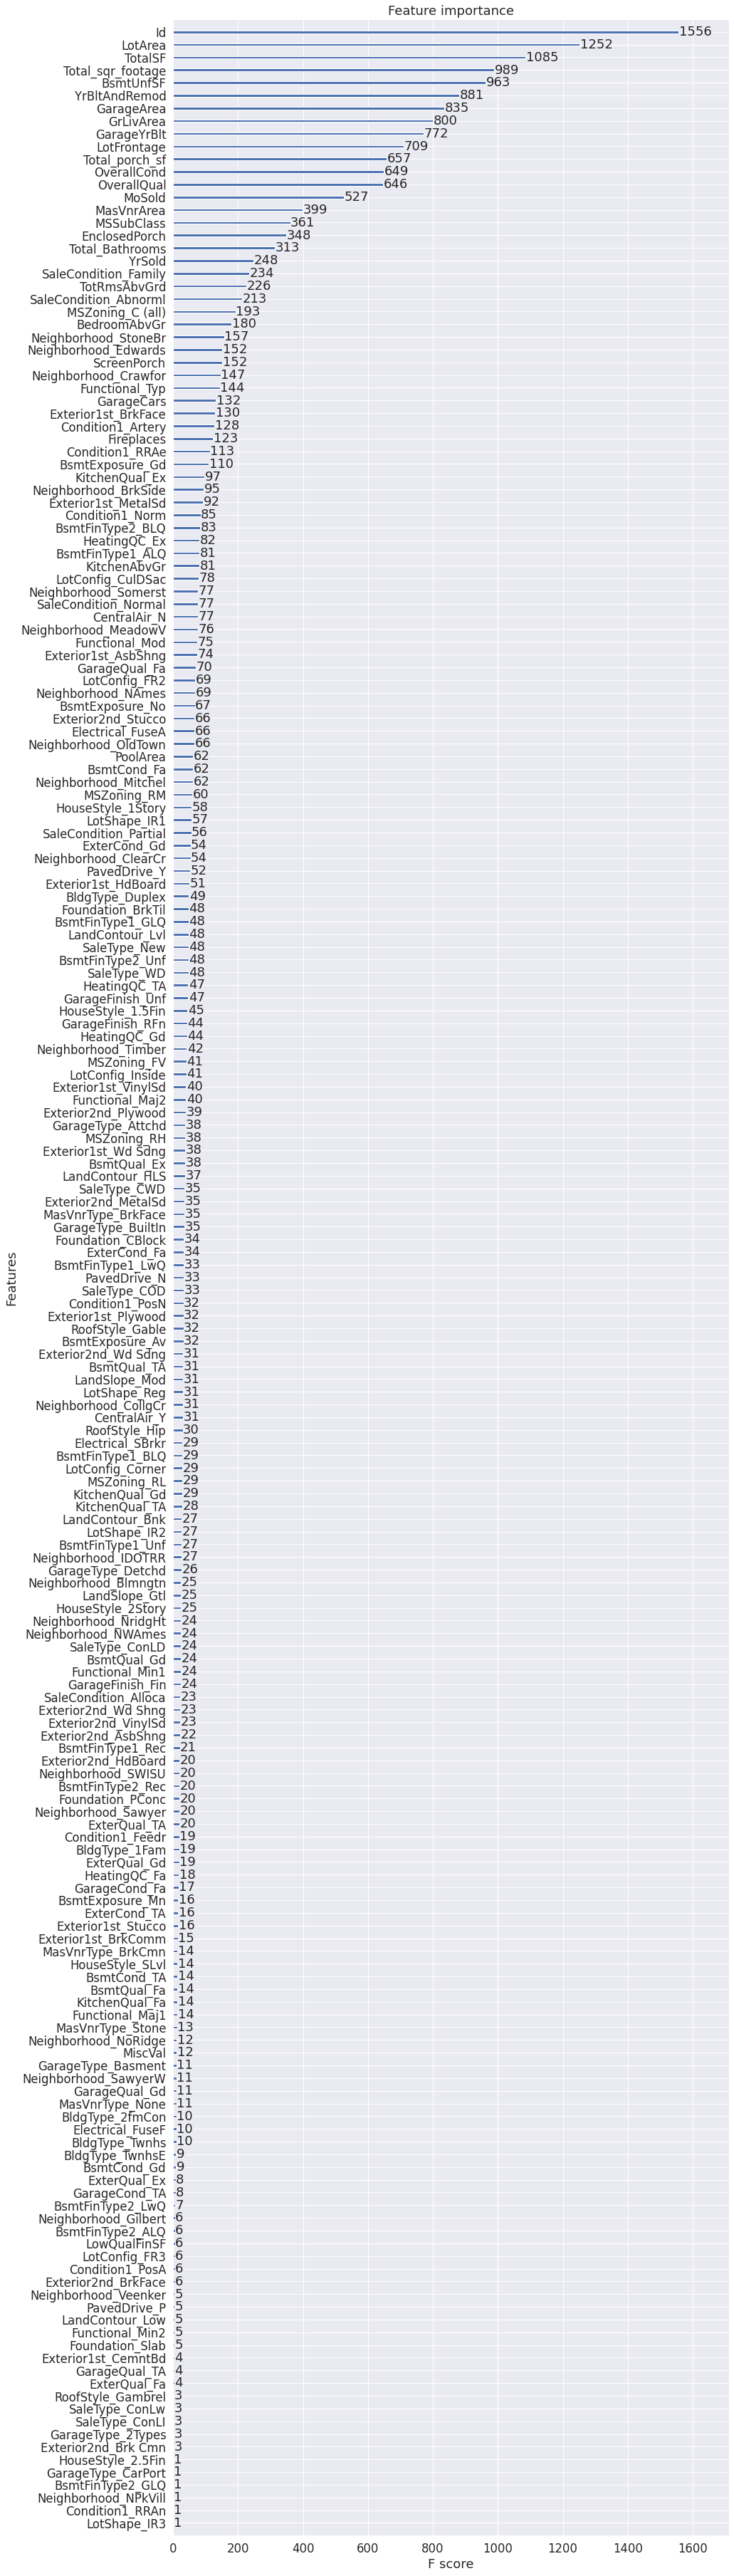

In [ ]:
plt.rcParams["figure.figsize"] = (14, 65)
plot_importance(xgb)

Abbiamo provato a togliere feature al di sotto di una certa soglia (100) ma i risultati non sono migliorati, per questo abbiamo deciso di mantenere il dataset uguale a quello ottenuto alla fine della fase di data preprocessing.



### Cross-Validation with eXtreme Gradient Boosting



Applichiamo ora la Cross Validation per provare a migliorare ulteriormente le prestazioni ed i risultati ottenuti con l'eXtreme Gradient Boosting.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)  

lm = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

scores = cross_val_score(lm, X_train, y_train, cv = 6)    
print(scores, np.mean(scores), np.std(scores))

predictions = cross_val_predict(lm, X_test, y_test, cv =6)    

accuracy = r2_score(y_test, predictions) 

lm.fit(X_train, y_train)

y_hat = lm.predict(X_test)   
print(lm)
lm.score(X_test, y_test)   

[08:16:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.93075444 0.89350408 0.93614235 0.93106641 0.88486712 0.92628214] 0.9171027573599989 0.020100388963748828
[08:18:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08

0.9103105946258329

## Random Forest

Applichiamo ora l'algoritmo Random Forest Regressor

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=3000, max_leaf_nodes=16, random_state=42)
rf_reg.fit(X, Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=16,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

## Extra Trees

Applichiamo ora l'algoritmo Extra Trees Regressor (una versione ancora più randomizzata del Random Forest Regressor)

In [ ]:
etr_reg=ExtraTreesRegressor(n_estimators=1500, min_samples_split=10,max_leaf_nodes=16, random_state=42)
etr_reg.fit(X, Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=16,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=10, min_weight_fraction_leaf=0.0,
                    n_estimators=1500, n_jobs=None, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)

Commento a Random Forest ed Extra Trees: algoritmi molto veloci e prestazionali grazie all'elevata randomizzazione, ma con risultati inferiori rispetto agli altri algoritmi.

## Stacking

Applichiamo ora la tecnica dello stacking, utilizzando come base learners i regressori visti in precedenza: 


1.   Extra Trees Regressor
2.   Random Forest Regressor
3.   XGB Regressor (utilizziamo i parametri della CrossValidation)
4.   Gradient Boosting Regressor (utilizzando i best parameters della grid search)




In [ ]:
etr_reg1=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=16,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=10, min_weight_fraction_leaf=0.0,
                    n_estimators=1500, n_jobs=None, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)
rf_reg1=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=16,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
xgb1=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=0, missing=None, n_estimators=3460,
             n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
             reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1, seed=27,
             silent=None, subsample=0.7, verbosity=1)
gbr1=GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4, 
                               max_features='sqrt', min_samples_leaf=15,
                               min_samples_split=10, n_estimators=3000, random_state=42)
     

Come meta learner utilizziamo nuovamente l'eXtreme Gradient Boosting, che preso singolarmente è l'algoritmo che ha ottenuto i risultati migliori.

In [ ]:
stack_gen = StackingRegressor(regressors=[etr_reg1,rf_reg1,xgb1,gbr1],
                                meta_regressor=XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006),
                                use_features_in_secondary=True)

In [ ]:
stack_gen.fit(X, Y)

[08:20:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:20:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingRegressor(meta_regressor=XGBRegressor(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=0.7, gamma=0,
                                              importance_type='gain',
                                              learning_rate=0.01,
                                              max_delta_step=0, max_depth=3,
                                              min_child_weight=0, missing=None,
                                              n_estimators=3460, n_jobs=1,
                                              nthread=-1,
                                              objective='reg:linear',
                                              random_state=0, reg_alpha=6e-05,
                                              reg_lambd...
                                                        max_leaf_nodes=None,

## Submit the final model

In [ ]:
pred = np.expm1(best_configured_model.predict(testDummies))#Submit prediction

sub = pd.DataFrame() #Create a new DataFrame for submission
sub['Id'] = testDummies_id
sub['SalePrice'] = pred
sub.to_csv("submissionLassoGridSearch_finale.csv", index=False)